In [2]:
import os
import re
import json
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams

from melody import Melody
from utils import notes_to_midi, notes_and_chord_to_midi
from objective_metrics import compute_piece_pitch_entropy, compute_piece_groove_similarity, compute_piece_chord_progression_irregularity

rcParams['figure.figsize'] = 20,10

In [3]:
folder = '../data/split_melody'
filepaths = [y for x in os.walk(folder) for y in glob(os.path.join(x[0], '*.csv'))]

In [4]:
irb_chord_progressions_filepath = '../data/chord_progressions/irb_chord_progressions.json'
wdb_chord_progressions_filepath = '../data/chord_progressions/weimar_db.json'
manual_chord_progressions_filepath = '../data/chord_progressions/manual_chord_progressions.json'

chord_progressions = {}
chord_progressions.update(json.load(open(irb_chord_progressions_filepath)))
chord_progressions.update(json.load(open(wdb_chord_progressions_filepath)))
chord_progressions.update(json.load(open(manual_chord_progressions_filepath)))

In [5]:
filepaths

['../data/split_melody/Doug McKenzie/Alone Together_1.csv',
 '../data/split_melody/Doug McKenzie/Autumn Leaves_1.csv',
 '../data/split_melody/Doug McKenzie/Autumn Leaves_2.csv',
 '../data/split_melody/Doug McKenzie/Autumn Leaves_3.csv',
 '../data/split_melody/Doug McKenzie/Autumn Leaves_4.csv',
 '../data/split_melody/Doug McKenzie/Autumn Leaves_5.csv',
 '../data/split_melody/Doug McKenzie/Autumn Leaves_6.csv',
 '../data/split_melody/Doug McKenzie/Autumn Leaves_7.csv',
 '../data/split_melody/Doug McKenzie/Blue Room_1.csv',
 '../data/split_melody/Doug McKenzie/But Beautiful_1.csv',
 '../data/split_melody/Doug McKenzie/But Beautiful_2.csv',
 '../data/split_melody/Doug McKenzie/But Beautiful_3.csv',
 '../data/split_melody/Doug McKenzie/Come Rain Or Come Shine (1)_1.csv',
 '../data/split_melody/Doug McKenzie/Come Rain Or Come Shine (1)_2.csv',
 '../data/split_melody/Doug McKenzie/Come Rain Or Come Shine (2)_1.csv',
 '../data/split_melody/Doug McKenzie/Come Sunday_1.csv',
 '../data/split_mel

In [6]:
metrics = {}

# filepath = '../data/split_melody/Real Book/All Of Me_original.csv'

all_dfs = []

for filepath in filepaths:
    song_name = os.path.basename(filepath).replace('.csv', '')
    song_name = "".join(song_name.split(' - ')[-1])
    song_name = re.sub('\(.*\)', '', song_name).strip()
    song_name = re.sub('_[0-9]', '', song_name)
    song_name = re.sub('_original', '', song_name)
    
    print(filepath) 

    original = 'Real Book' in filepath

    df = pd.read_csv(filepath, index_col=0)
    
    df['filename'] = filepath
    df['song'] = song_name
    df['original'] = original
    
    all_dfs.append(df)

    pe1 = compute_piece_pitch_entropy(df, 1)
    pe4 = compute_piece_pitch_entropy(df, 4)
    gs = compute_piece_groove_similarity(df, max_pairs=np.inf)
        
    metrics[filepath] = {
        'H1': pe1,
        'H4': pe4,
        'GS': gs,
        'original': original
    }
    

total_df = pd.concat(all_dfs)  

../data/split_melody/Doug McKenzie/Alone Together_1.csv
../data/split_melody/Doug McKenzie/Autumn Leaves_1.csv
../data/split_melody/Doug McKenzie/Autumn Leaves_2.csv
../data/split_melody/Doug McKenzie/Autumn Leaves_3.csv
../data/split_melody/Doug McKenzie/Autumn Leaves_4.csv
../data/split_melody/Doug McKenzie/Autumn Leaves_5.csv
../data/split_melody/Doug McKenzie/Autumn Leaves_6.csv
../data/split_melody/Doug McKenzie/Autumn Leaves_7.csv
../data/split_melody/Doug McKenzie/Blue Room_1.csv
../data/split_melody/Doug McKenzie/But Beautiful_1.csv
../data/split_melody/Doug McKenzie/But Beautiful_2.csv
../data/split_melody/Doug McKenzie/But Beautiful_3.csv
../data/split_melody/Doug McKenzie/Come Rain Or Come Shine (1)_1.csv
../data/split_melody/Doug McKenzie/Come Rain Or Come Shine (1)_2.csv
../data/split_melody/Doug McKenzie/Come Rain Or Come Shine (2)_1.csv
../data/split_melody/Doug McKenzie/Come Sunday_1.csv
../data/split_melody/Doug McKenzie/Dancing On The Ceiling_1.csv
../data/split_melod

../data/split_melody/Jazz-Midi/The Party's Over_1.csv
../data/split_melody/Jazz-Midi/The Shadow Of Your Smile_1.csv
../data/split_melody/Jazz-Midi/The Shadow Of Your Smile_2.csv
../data/split_melody/Jazz-Midi/The Shadow Of Your Smile_3.csv
../data/split_melody/Jazz-Midi/They Can't Take That Away From Me (2)_1.csv
../data/split_melody/Jazz-Midi/They Can't Take That Away From Me (2)_2.csv
../data/split_melody/Jazz-Midi/Watermelon Man_1.csv
../data/split_melody/Jazz-Midi/Watermelon Man_3.csv
../data/split_melody/Jazz-Midi/Watermelon Man_5.csv
../data/split_melody/Jazz-Midi/Watermelon Man_6.csv
../data/split_melody/Jazz-Midi/Yesterdays_1.csv
../data/split_melody/Jazz-Midi/Yesterdays_2.csv
../data/split_melody/Jazz-Midi/You Are Too Beautiful_1.csv
../data/split_melody/JazzPage/A Felicidade_1.csv
../data/split_melody/JazzPage/A Night In Tunisia_1.csv
../data/split_melody/JazzPage/A Night In Tunisia_2.csv
../data/split_melody/JazzPage/All Of Me (1)_1.csv
../data/split_melody/JazzPage/All Of M

/media/manu/Data/PycharmProjects/thesis/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/media/manu/Data/PycharmProjects/thesis/venv/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


../data/split_melody/JazzPage/All The Things You Are_4.csv
../data/split_melody/JazzPage/Alone Together (2)_1.csv
../data/split_melody/JazzPage/Bewitched_1.csv
../data/split_melody/JazzPage/Blue Monk_1.csv
../data/split_melody/JazzPage/Blue Monk_2.csv
../data/split_melody/JazzPage/Blue Monk_3.csv
../data/split_melody/JazzPage/Blue Monk_4.csv
../data/split_melody/JazzPage/Blues For Alice_1.csv
../data/split_melody/JazzPage/Blues For Alice_2.csv
../data/split_melody/JazzPage/Blues For Alice_3.csv
../data/split_melody/JazzPage/Blues For Alice_4.csv
../data/split_melody/JazzPage/Blues For Alice_5.csv
../data/split_melody/JazzPage/Bye Bye Blackbird_1.csv
../data/split_melody/JazzPage/Bye Bye Blackbird_2.csv
../data/split_melody/JazzPage/Christmas Song_1.csv
../data/split_melody/JazzPage/Come Rain Or Come Shine (2)_1.csv
../data/split_melody/JazzPage/Come Rain Or Come Shine (2)_2.csv
../data/split_melody/JazzPage/Cottontail_1.csv
../data/split_melody/JazzPage/Cottontail_2.csv
../data/split_m

../data/split_melody/MidKar/You've Changed_1.csv
../data/split_melody/Oocities/Come Rain Or Come Shine_1.csv
../data/split_melody/Oocities/Come Rain Or Come Shine_2.csv
../data/split_melody/Oocities/Honeysuckle Rose_1.csv
../data/split_melody/Oocities/Nardis_1.csv
../data/split_melody/Oocities/Nardis_2.csv
../data/split_melody/Oocities/Nardis_3.csv
../data/split_melody/Oocities/Nardis_4.csv
../data/split_melody/Oocities/Nardis_5.csv
../data/split_melody/Oocities/Nardis_6.csv
../data/split_melody/Oocities/Night And Day_1.csv
../data/split_melody/Oocities/Night And Day_2.csv
../data/split_melody/Oocities/The Days Of Wine And Roses_1.csv
../data/split_melody/Oocities/The Days Of Wine And Roses_2.csv
../data/split_melody/Oocities/When Sunny Gets Blue_1.csv
../data/split_melody/Oocities/When Sunny Gets Blue_2.csv
../data/split_melody/Oocities/You've Changed_1.csv
../data/split_melody/Oocities/You've Changed_2.csv
../data/split_melody/Oocities/You've Changed_3.csv
../data/split_melody/Real B

../data/split_melody/Real Book/Jordu_original.csv
../data/split_melody/Real Book/Just Friends_original.csv
../data/split_melody/Real Book/Just The Way You Look Tonight_original.csv
../data/split_melody/Real Book/Lady Is A Tramp_original.csv
../data/split_melody/Real Book/Some Other Time_original.csv
../data/split_melody/Real Book/Someone To Watch Over Me_original.csv
../data/split_melody/Real Book/Sophisticated Lady_original.csv
../data/split_melody/Real Book/Speak Low_original.csv
../data/split_melody/Real Book/Speak No Evil_original.csv
../data/split_melody/Real Book/Spring Is Here_original.csv
../data/split_melody/Real Book/Star Eyes_original.csv
../data/split_melody/Real Book/Stella By Starlight_original.csv
../data/split_melody/Real Book/Straight, No Chaser_original.csv
../data/split_melody/Real Book/Strangers In The Night_original.csv
../data/split_melody/Real Book/Summertime_original.csv
../data/split_melody/Real Book/Sweet Georgia Brown_original.csv
../data/split_melody/Real Bo

../data/split_melody/Weimar DB/Stan Getz - My Funny Valentine_1.csv
../data/split_melody/Weimar DB/Stan Getz - My Funny Valentine_2.csv
../data/split_melody/Weimar DB/Steve Lacy - Ask Me Now_1.csv
../data/split_melody/Weimar DB/Steve Lacy - Let's Cool One_1.csv
../data/split_melody/Weimar DB/Wayne Shorter - Eighty-One_1.csv
../data/split_melody/Weimar DB/Wayne Shorter - Eighty-One_2.csv
../data/split_melody/Weimar DB/Wayne Shorter - Esp_1.csv
../data/split_melody/Weimar DB/Wayne Shorter - Esp_2.csv
../data/split_melody/Weimar DB/Wayne Shorter - Speak No Evil_1.csv
../data/split_melody/Weimar DB/Woody Shaw - Imagination_1.csv
../data/split_melody/Weimar DB/Zoot Sims - All The Things You Are_1.csv
../data/split_melody/Weimar DB/Zoot Sims - Night And Day (1)_1.csv
../data/split_melody/Weimar DB/Zoot Sims - Night And Day (2)_1.csv
../data/split_melody/Weimar DB/John Coltrane - Giant Steps (1)_2.csv
../data/split_melody/Weimar DB/John Coltrane - Giant Steps (1)_3.csv
../data/split_melody/We

In [7]:
pitch_classes = ['C','Db','D','Eb','E','F','F#','G', 'Ab', 'A', 'Bb', 'B']


total_df['pitch_class'] = (total_df['pitch'] % 12).apply([lambda x: pitch_classes[x]])

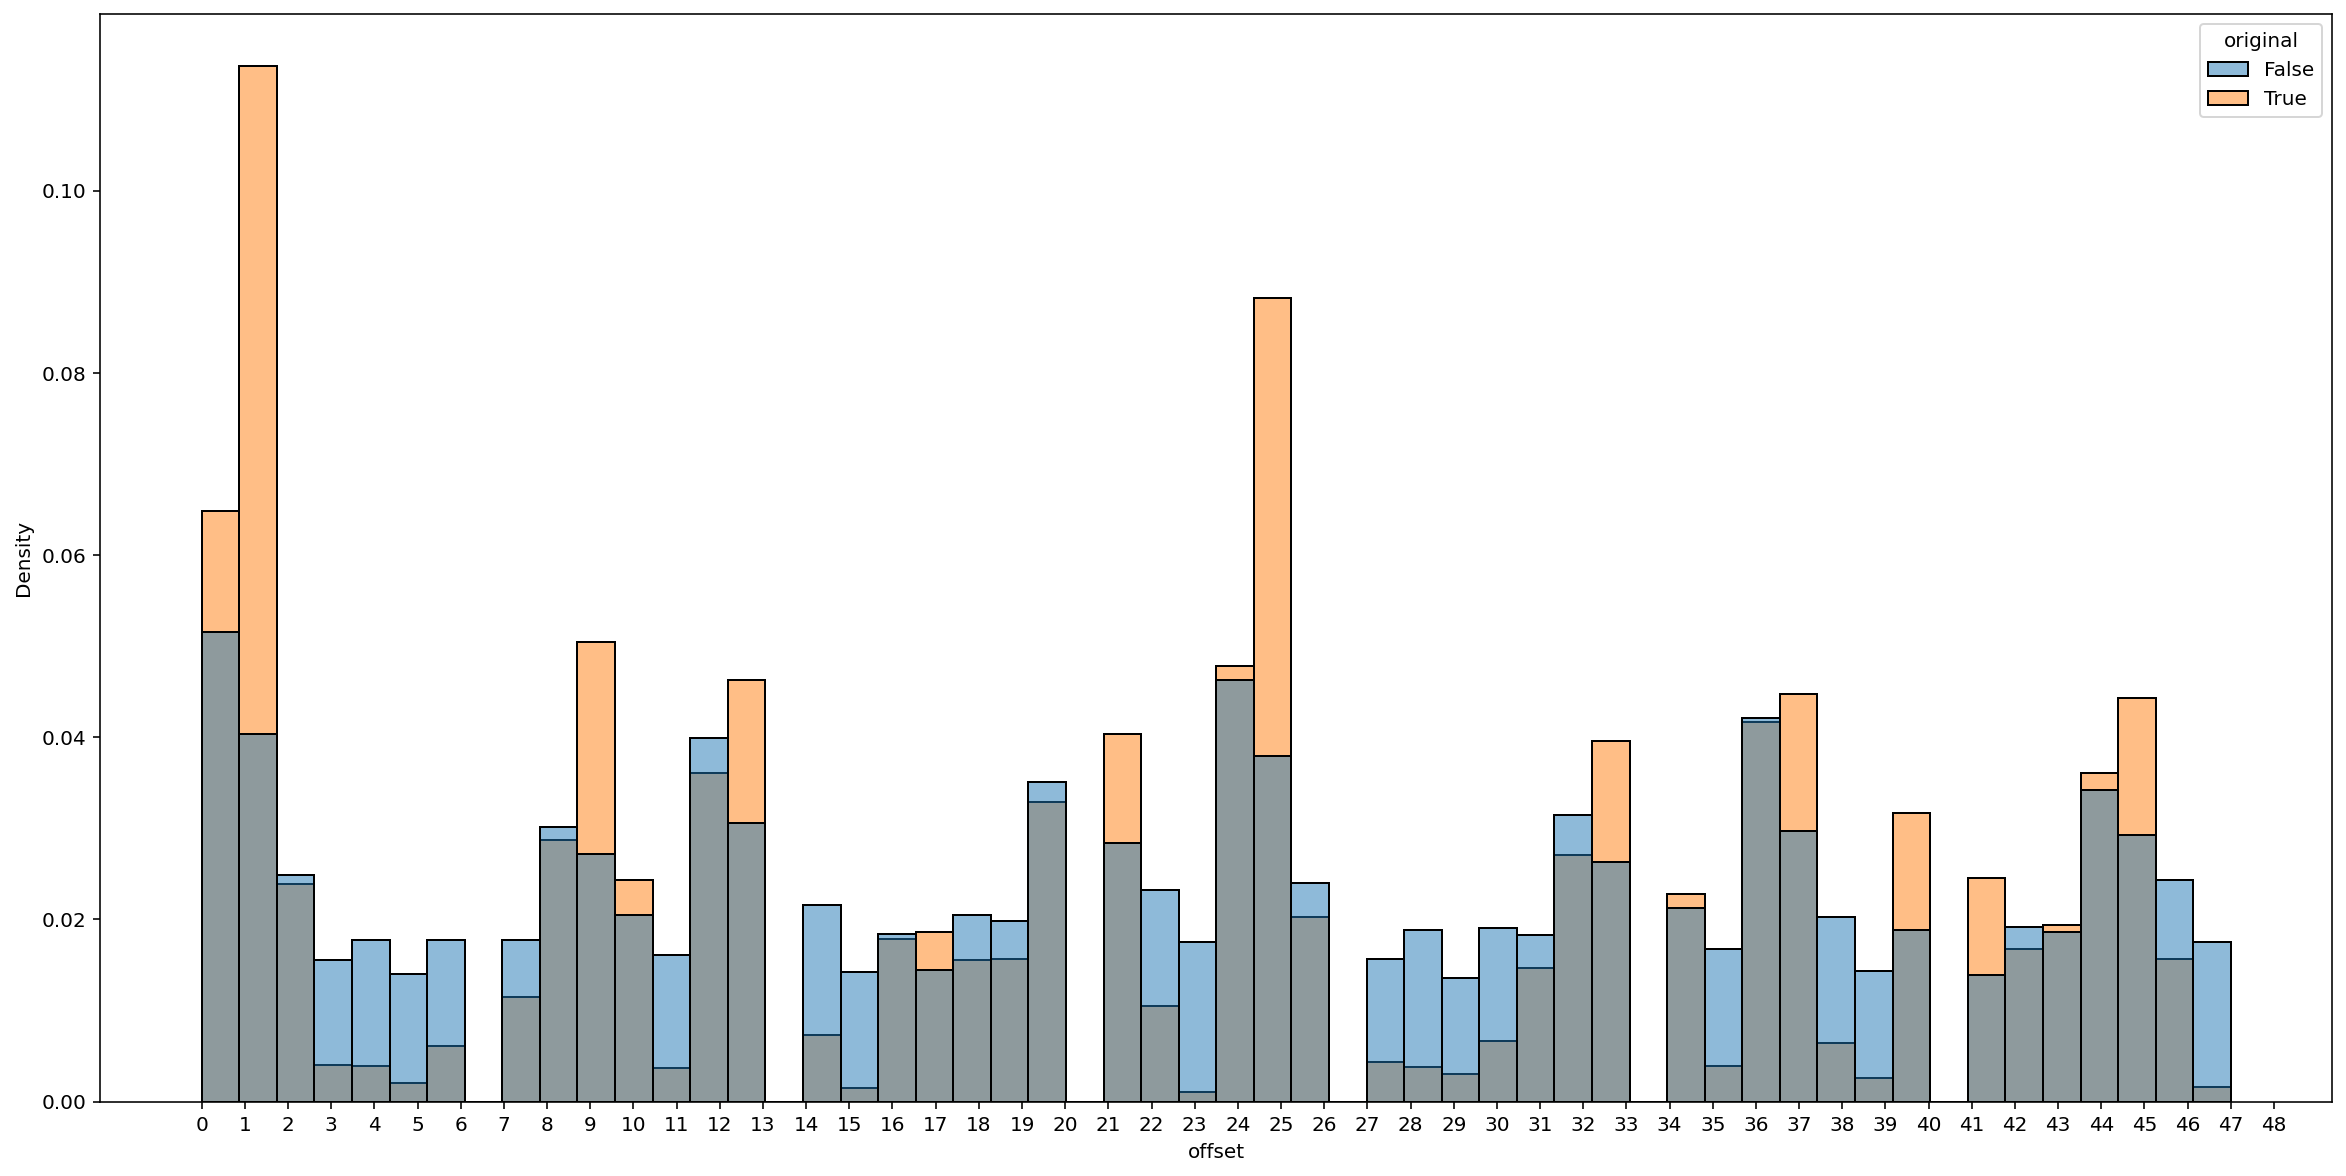

In [137]:
g = sns.histplot(
    data=total_df, 
    x='offset', hue='original',
    stat="density", common_norm=False
)
g.set_xticks(range(0,49))

/media/manu/Data/PycharmProjects/thesis/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


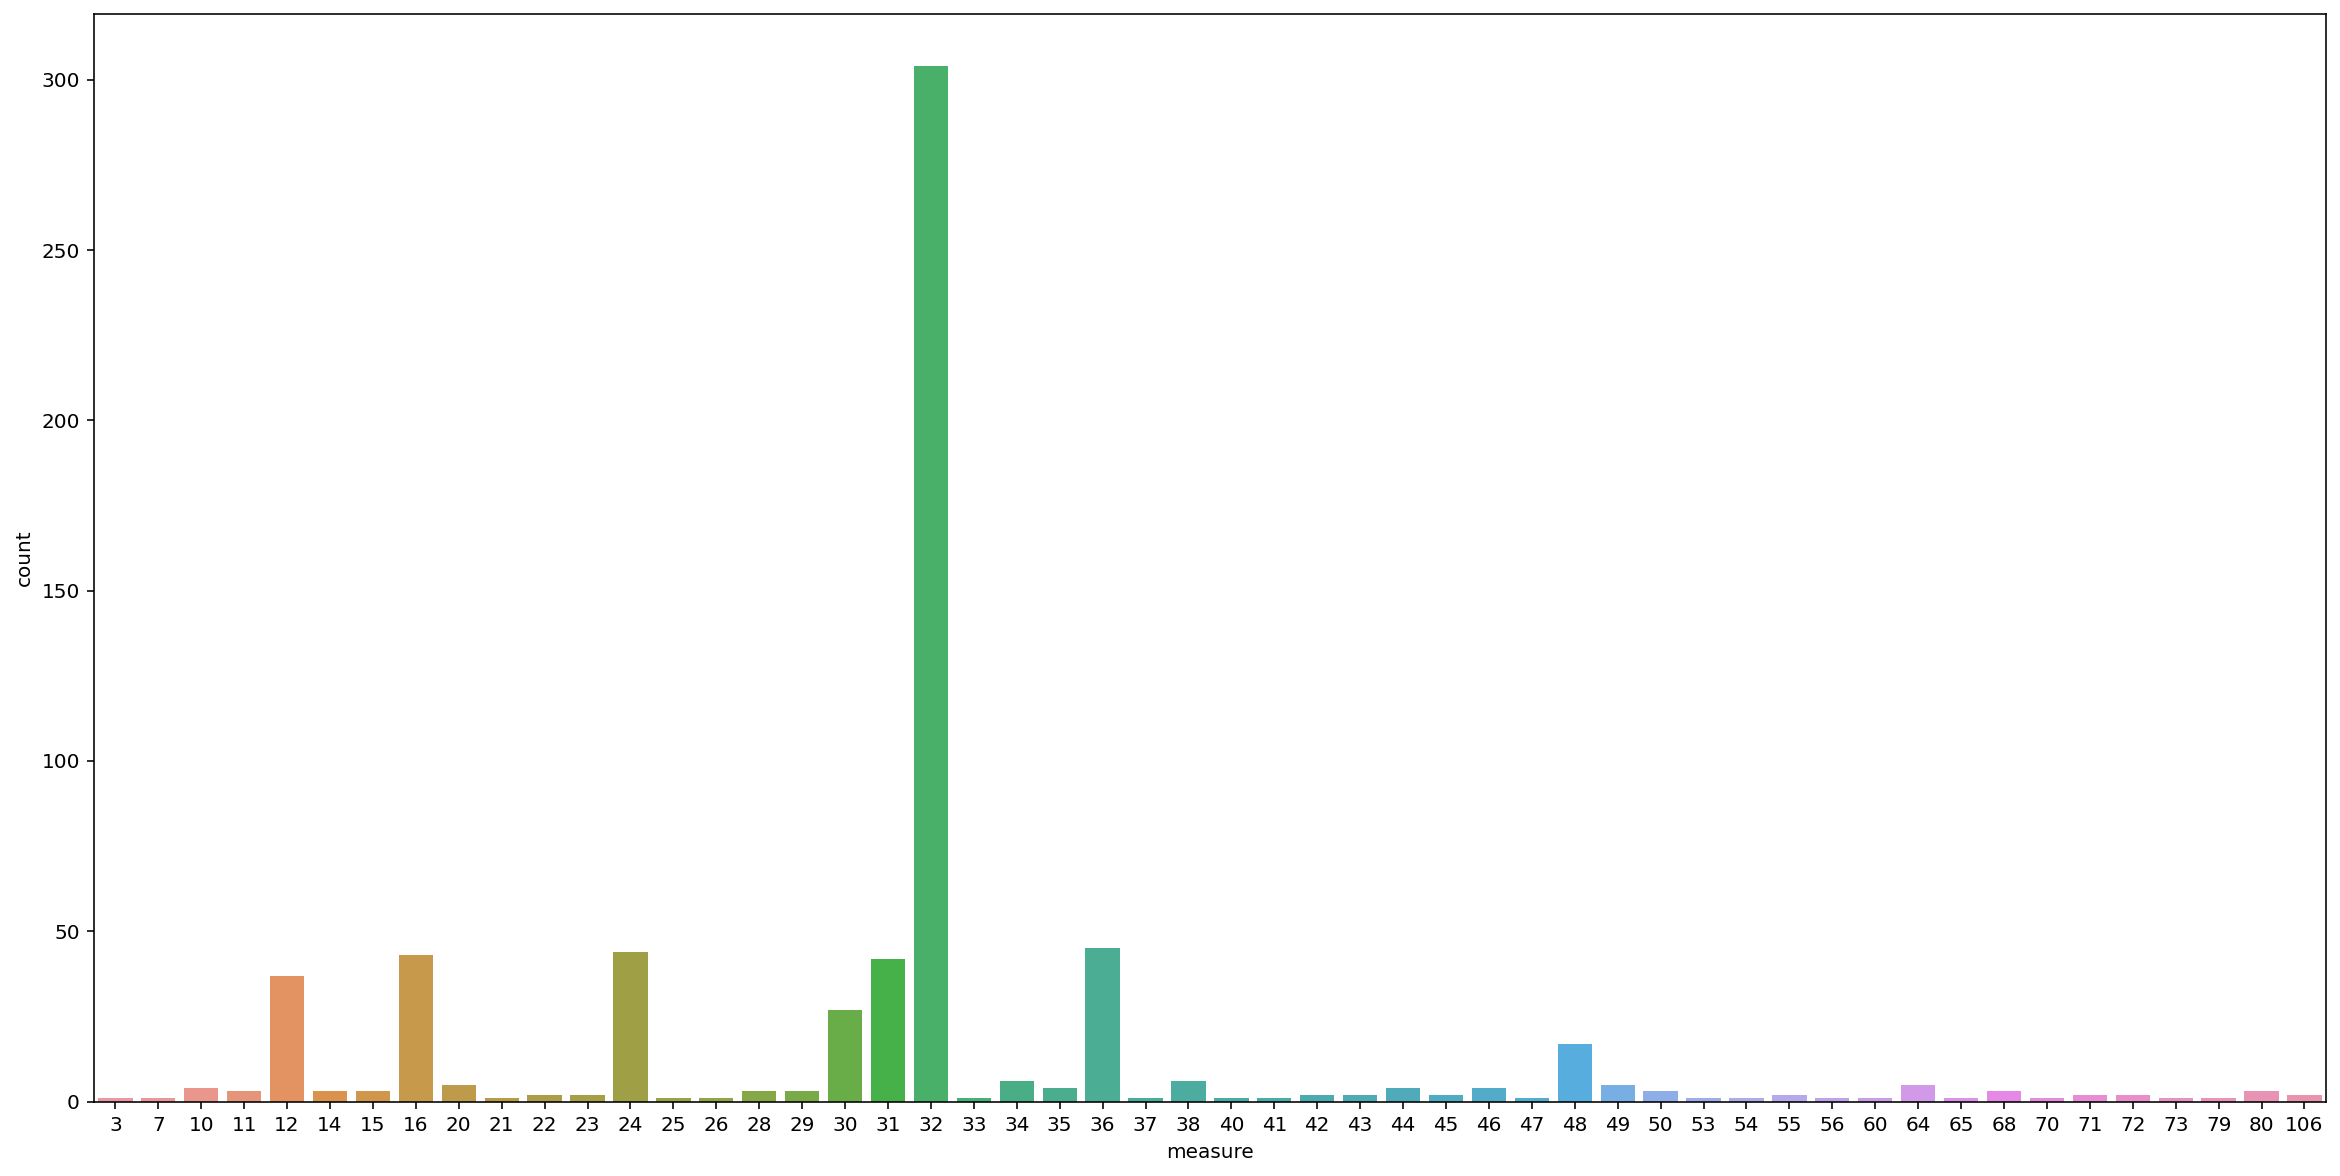

In [66]:
g = sns.countplot(total_df.groupby('filename')['measure'].apply(max) + 1)
# g.set_xticks(range(0,129,4))

In [13]:
print(
    total_df[total_df['original'] == True]['pitch'].min(),
    total_df[total_df['original'] == True]['pitch'].max()
)

40 93


In [12]:
print(
    total_df[total_df['original'] == False]['pitch'].min(),
    total_df[total_df['original'] == False]['pitch'].max()
)

21 115


[Text(36, 0, 'C'),
 Text(37, 0, 'Db'),
 Text(38, 0, 'D'),
 Text(39, 0, 'Eb'),
 Text(40, 0, 'E'),
 Text(41, 0, 'F'),
 Text(42, 0, 'F#'),
 Text(43, 0, 'G'),
 Text(44, 0, 'Ab'),
 Text(45, 0, 'A'),
 Text(46, 0, 'Bb'),
 Text(47, 0, 'B'),
 Text(48, 0, 'C'),
 Text(49, 0, 'Db'),
 Text(50, 0, 'D'),
 Text(51, 0, 'Eb'),
 Text(52, 0, 'E'),
 Text(53, 0, 'F'),
 Text(54, 0, 'F#'),
 Text(55, 0, 'G'),
 Text(56, 0, 'Ab'),
 Text(57, 0, 'A'),
 Text(58, 0, 'Bb'),
 Text(59, 0, 'B'),
 Text(60, 0, 'C'),
 Text(61, 0, 'Db'),
 Text(62, 0, 'D'),
 Text(63, 0, 'Eb'),
 Text(64, 0, 'E'),
 Text(65, 0, 'F'),
 Text(66, 0, 'F#'),
 Text(67, 0, 'G'),
 Text(68, 0, 'Ab'),
 Text(69, 0, 'A'),
 Text(70, 0, 'Bb'),
 Text(71, 0, 'B'),
 Text(72, 0, 'C'),
 Text(73, 0, 'Db'),
 Text(74, 0, 'D'),
 Text(75, 0, 'Eb'),
 Text(76, 0, 'E'),
 Text(77, 0, 'F'),
 Text(78, 0, 'F#'),
 Text(79, 0, 'G'),
 Text(80, 0, 'Ab'),
 Text(81, 0, 'A'),
 Text(82, 0, 'Bb'),
 Text(83, 0, 'B'),
 Text(84, 0, 'C'),
 Text(85, 0, 'Db'),
 Text(86, 0, 'D'),
 Text(87, 

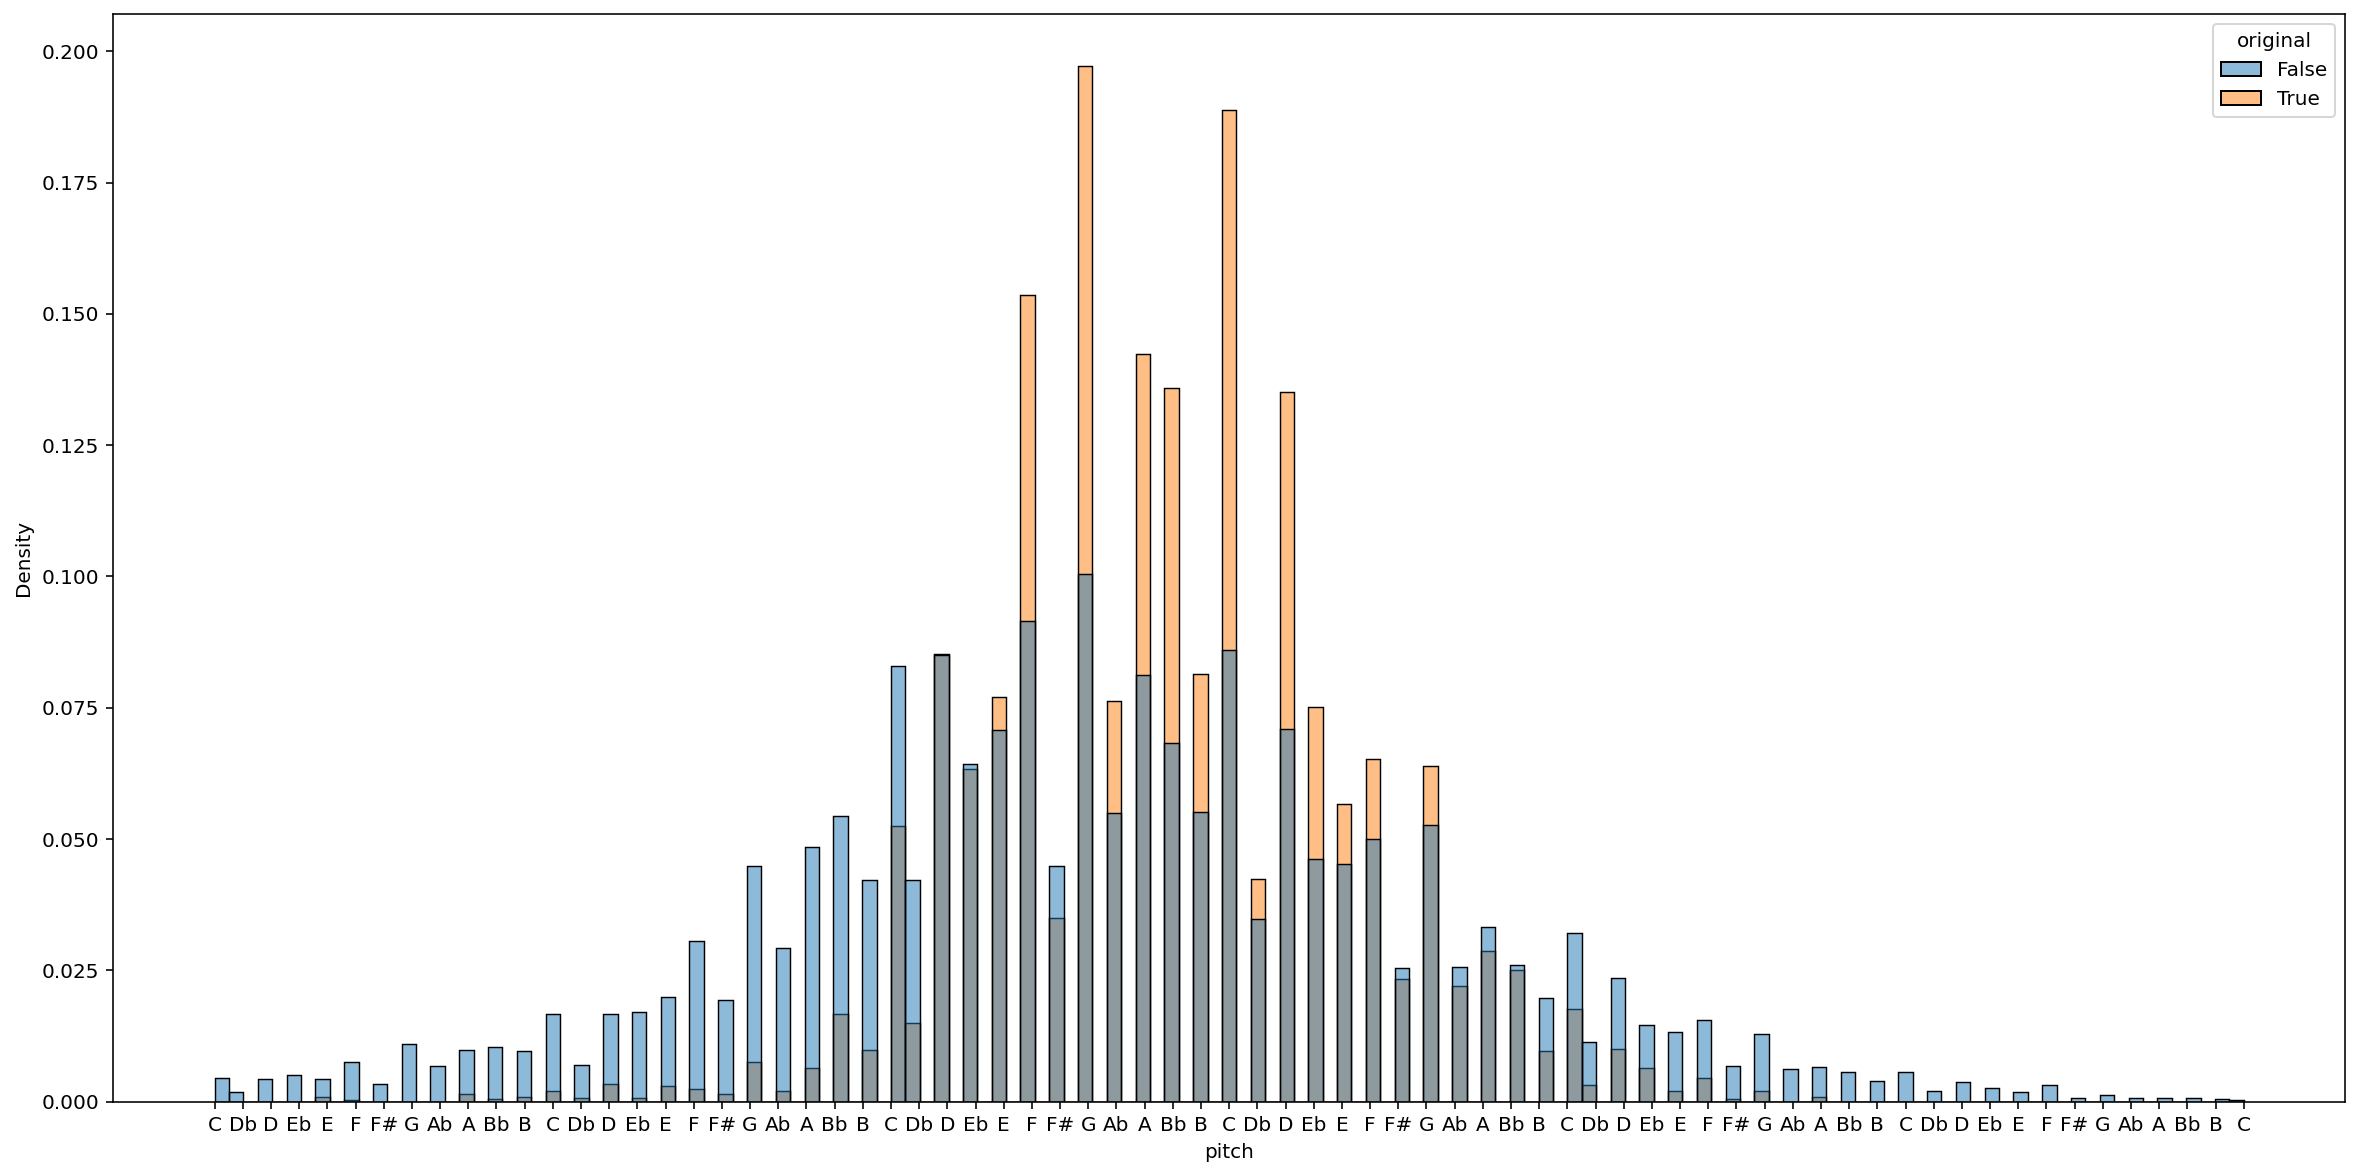

In [136]:
g = sns.histplot(data=total_df[(total_df['pitch']<109) & (total_df['pitch']>=36)], 
                 x='pitch', 
                 hue='original',
                 stat="density", common_norm=False
                )
g.set_xticks(range(36,109))
g.set_xticklabels(pitch_classes * 6 + ['C'])

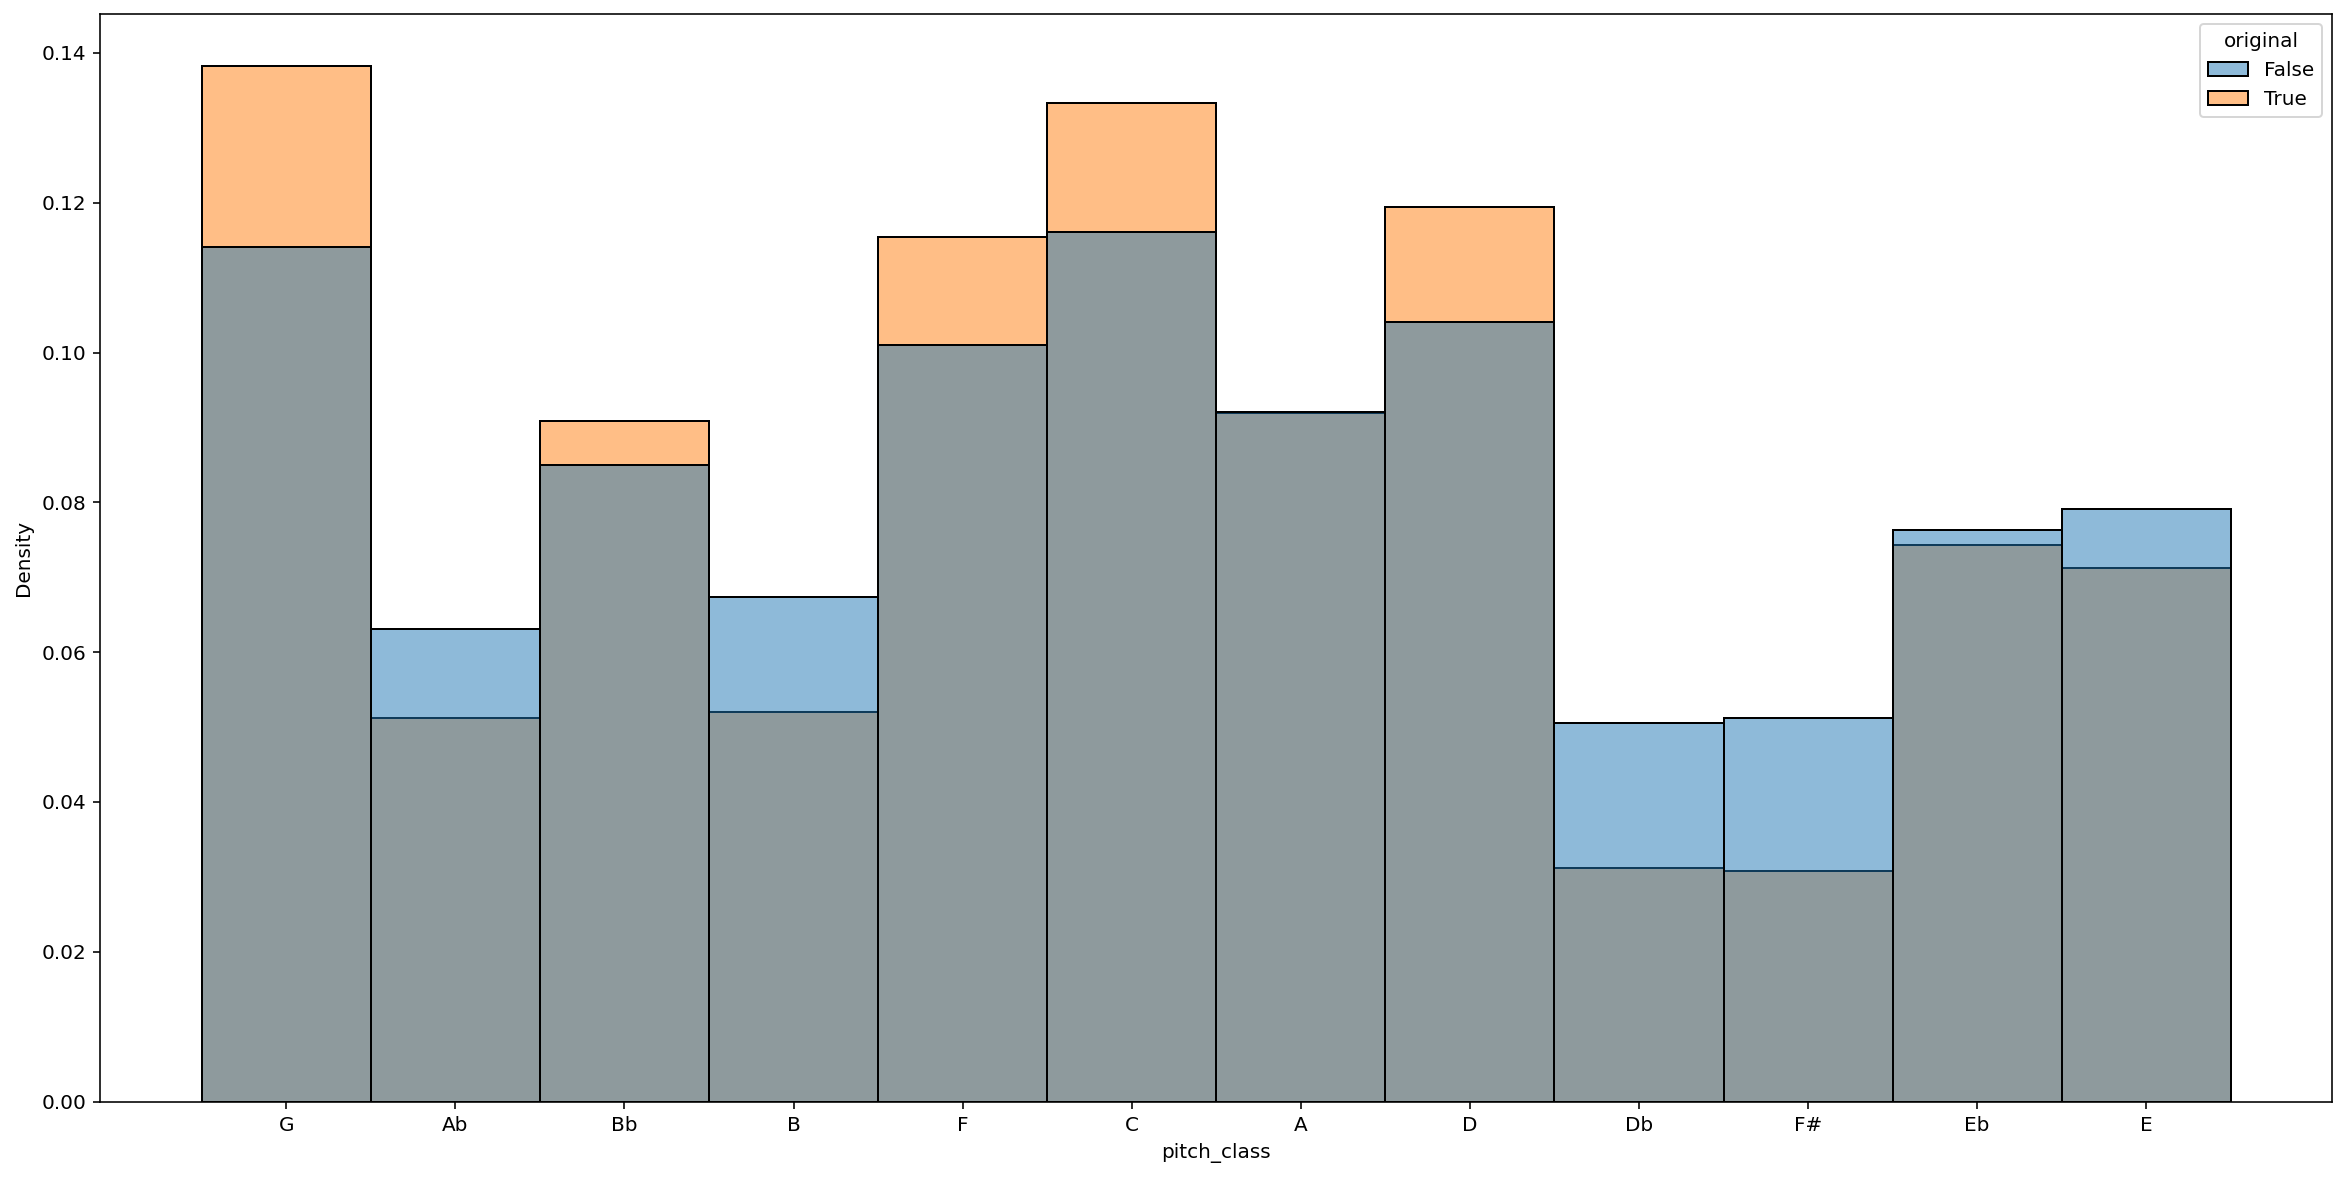

In [135]:
g = sns.histplot(data=total_df, 
                  x='pitch_class', hue='original', 
                  stat="density", common_norm=False
 )

In [104]:
total_df = total_df.merge(pd.DataFrame(total_df.groupby('filename').size()), how='left', left_on='filename', right_on='filename')
total_df = total_df.rename(columns={0: 'n_notes'})
print(
    total_df['n_notes'].min(),
    total_df['n_notes'].max(),
)

21 1297


<AxesSubplot:xlabel='n_notes', ylabel='Count'>

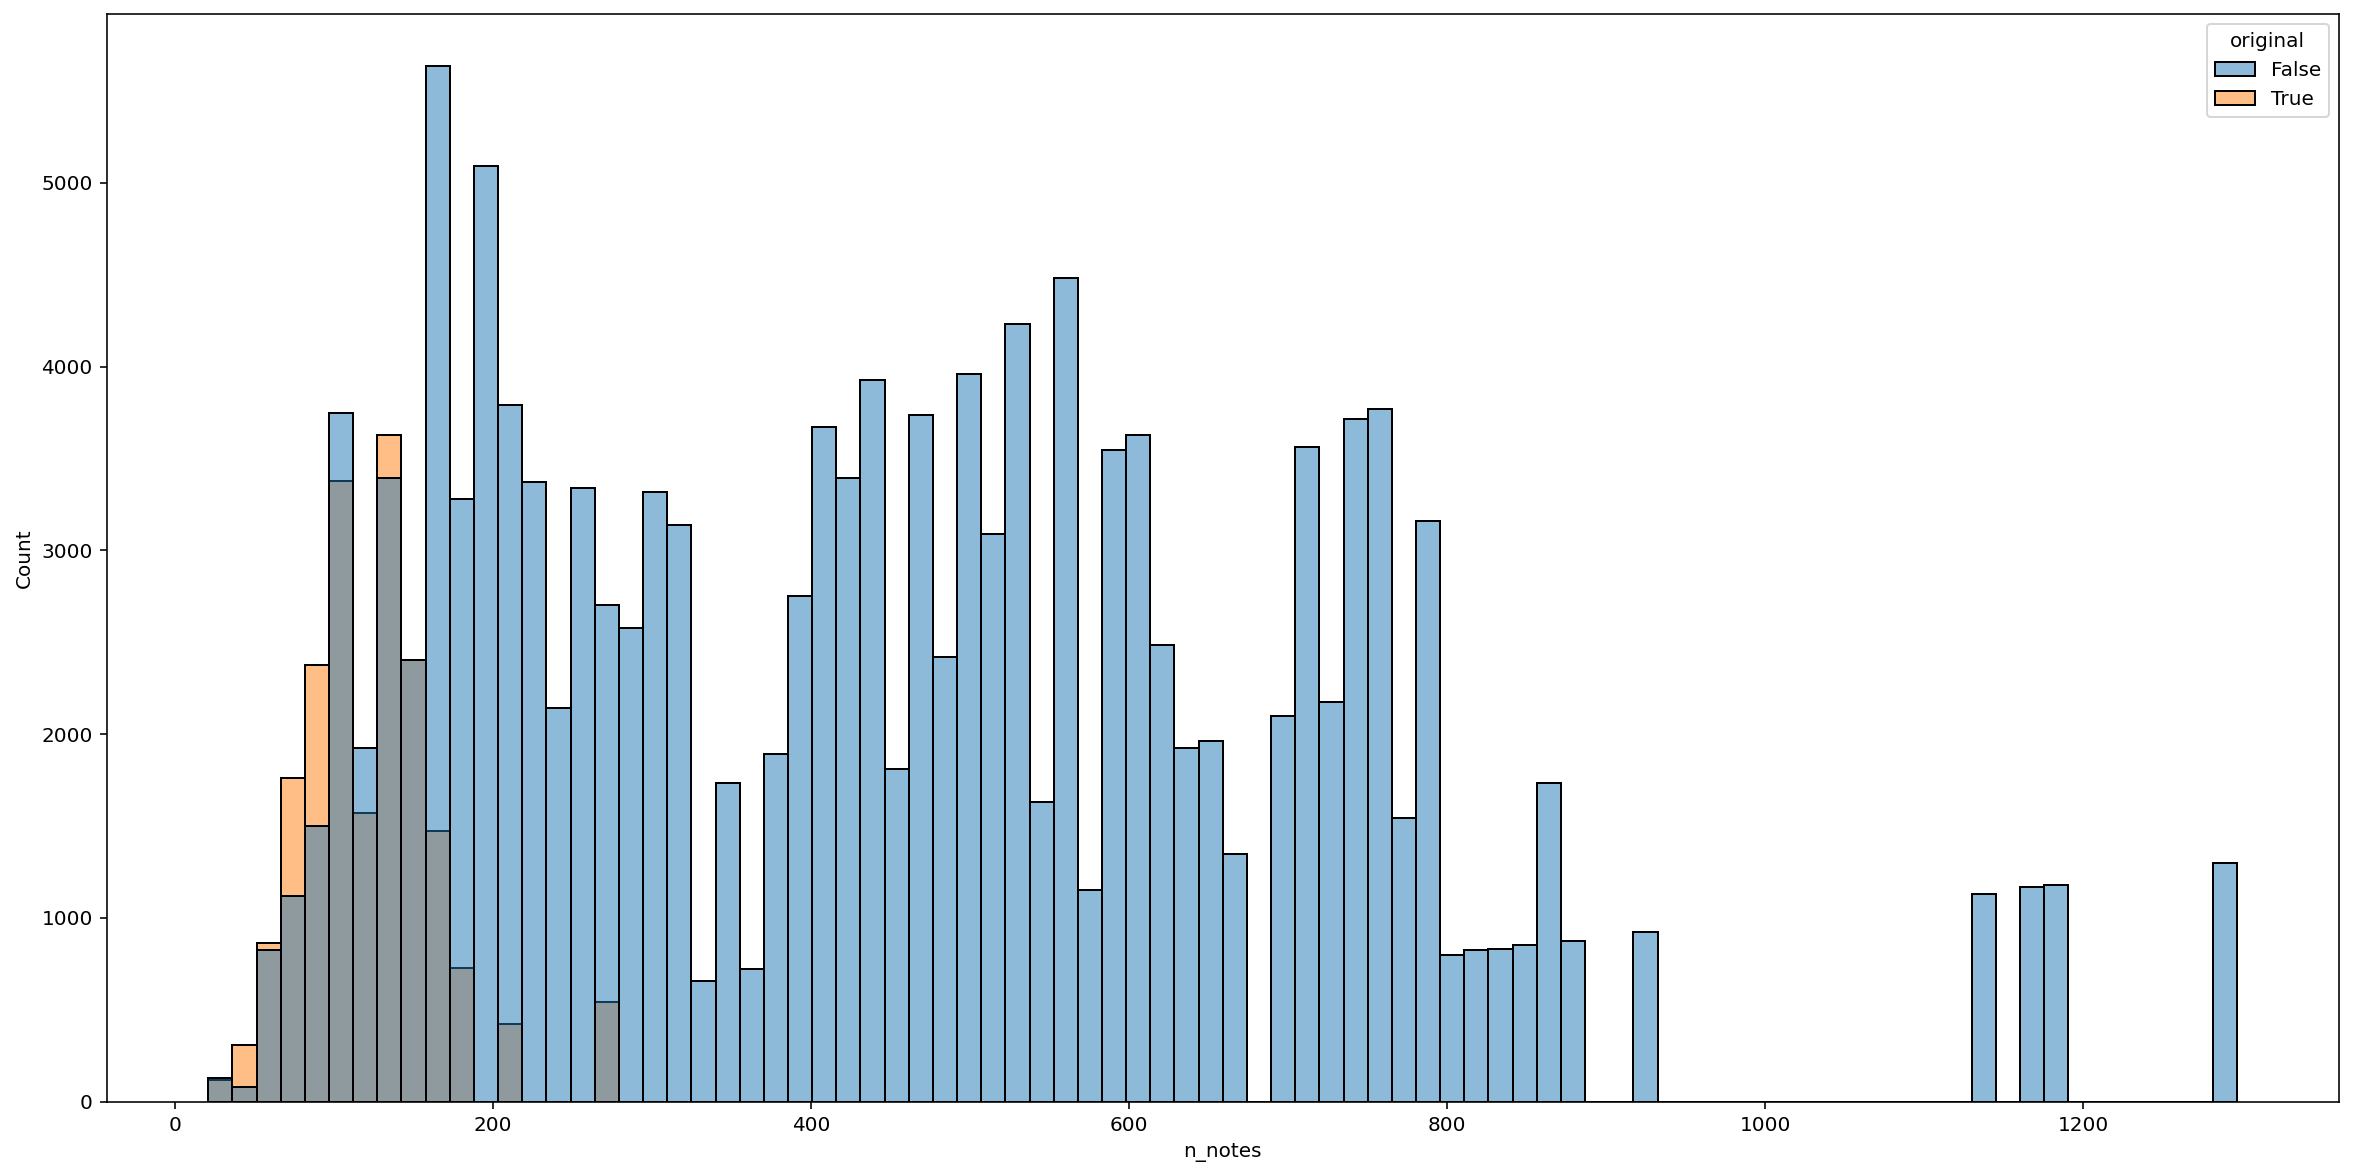

In [105]:
sns.histplot(data=total_df, x='n_notes', hue='original')

/media/manu/Data/PycharmProjects/thesis/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='filename', ylabel='count'>

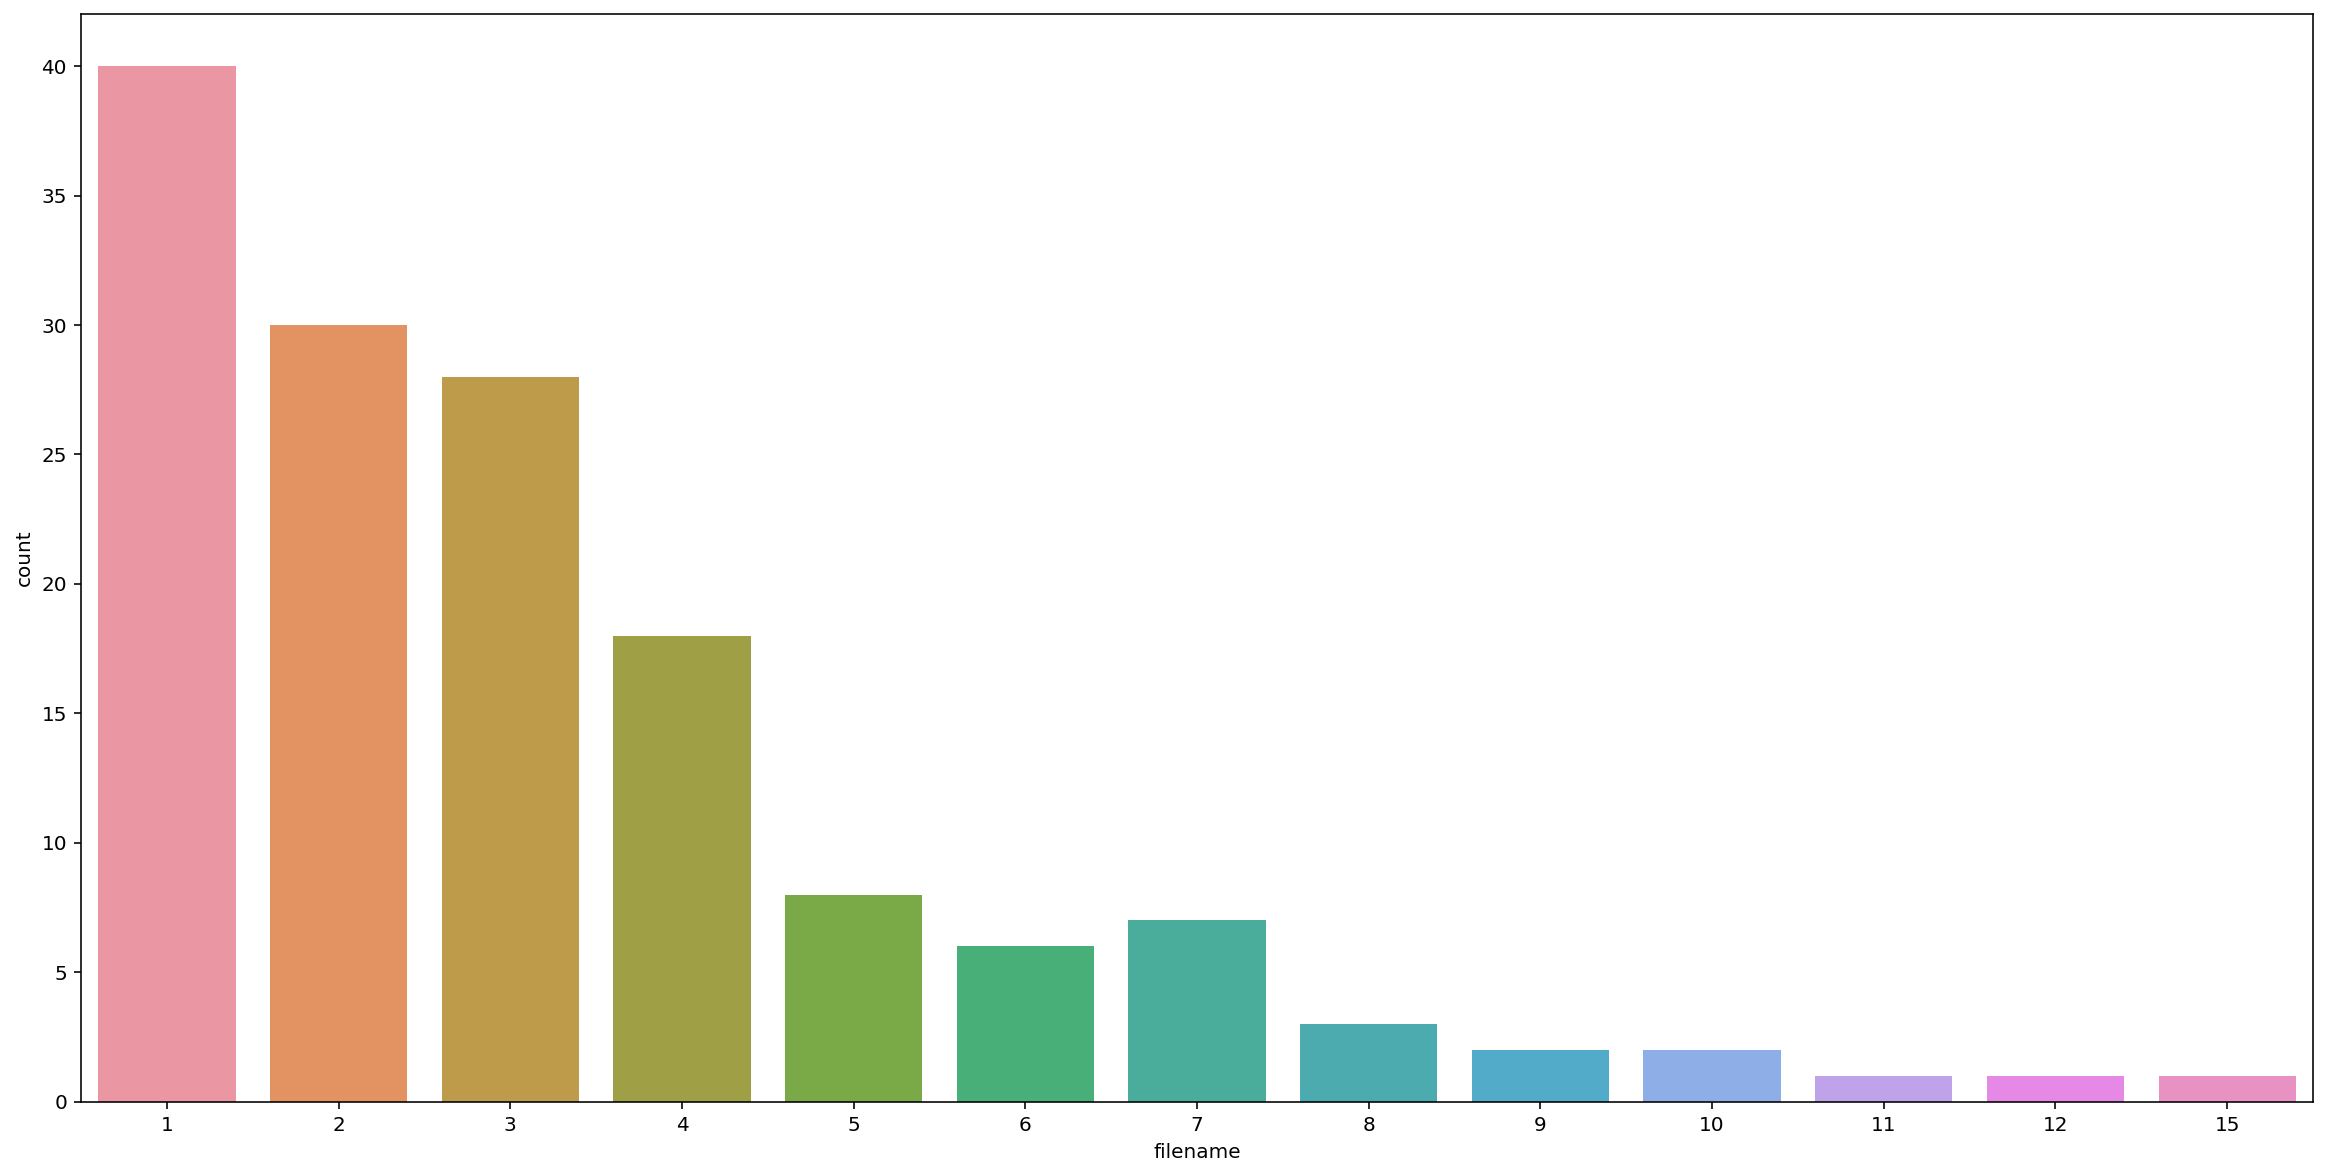

In [106]:
sns.countplot(total_df[total_df['original'] == False].groupby('song')['filename'].unique().apply(len))

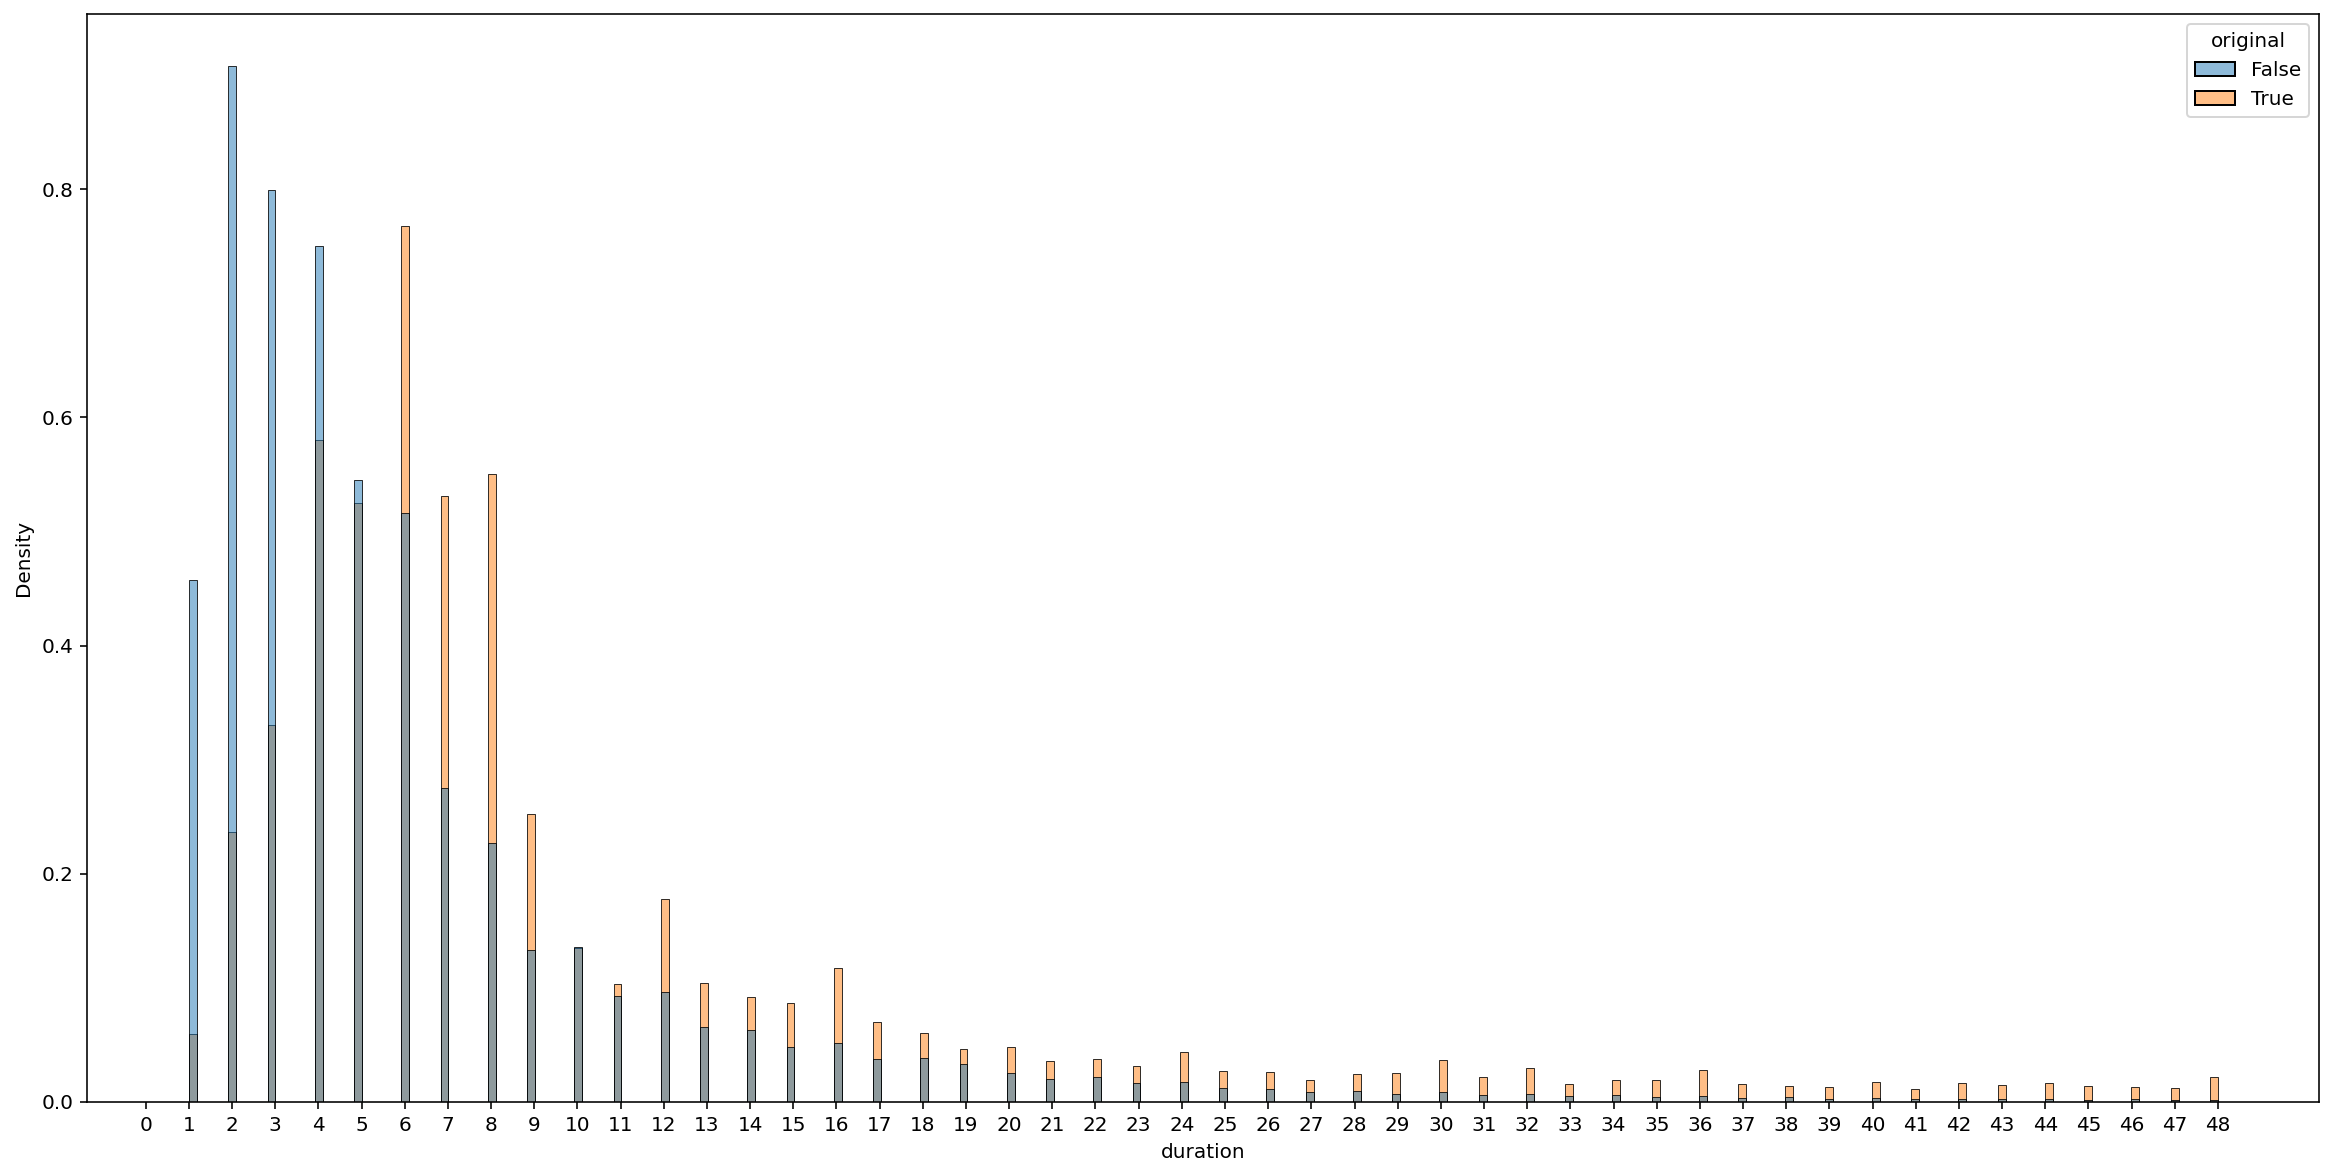

In [141]:
g = sns.histplot(data=total_df[total_df['duration'] <= 48], x='duration', hue='original', stat="density", common_norm=False)
g.set_xticks(range(0,49))

In [139]:
total_df['duration'].value_counts()

2      24758
3      22226
4      21769
6      16236
5      16169
       ...  
96         1
124        1
136        1
185        1
131        1
Name: duration, Length: 123, dtype: int64

In [108]:
import ast
import music21

context  = music21.key.Key('C')

total_df['chord_notes_triads'] = total_df['chord_notes'].apply([lambda x: str(ast.literal_eval(x)[1:4])])

<AxesSubplot:xlabel='chord_root', ylabel='count'>

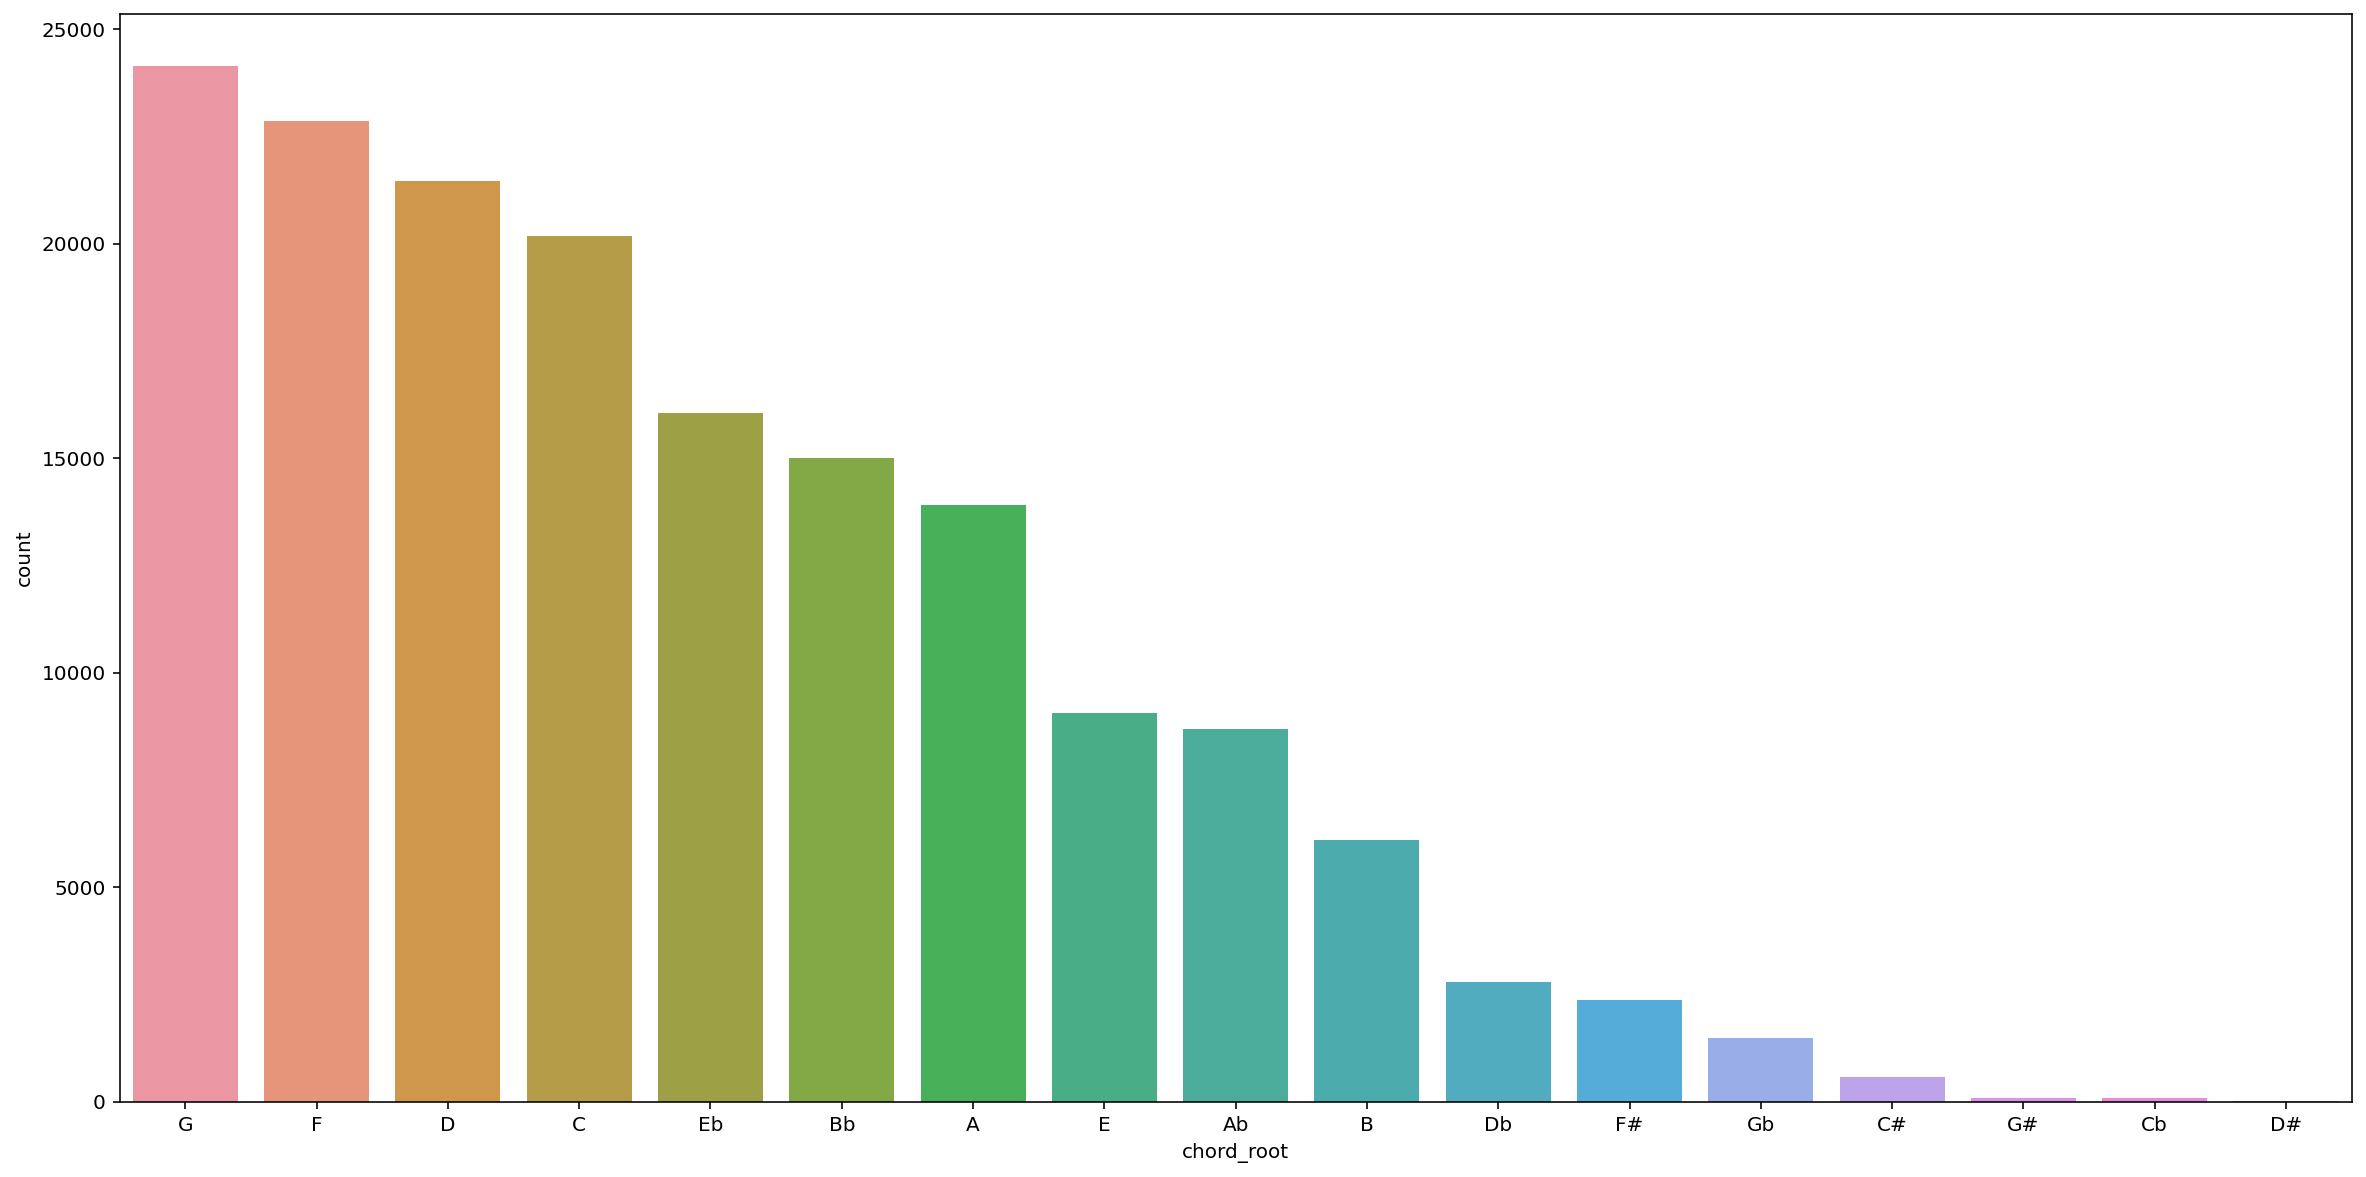

In [109]:
sns.countplot(data=total_df, x='chord_root', order=total_df['chord_root'].value_counts().index)

In [110]:
chord_map = {}

for uc in total_df['chord_notes_triads'].unique():
    c = ast.literal_eval(uc)
    chord_map[uc] = music21.chord.Chord(c).simplifyEnharmonics(keyContext=context).pitchedCommonName
    

In [113]:
total_df['chord_notes_triad_names'] = total_df['chord_notes_triads'].apply([lambda x: chord_map[x]])
total_df['chord_notes_triad_names'] = total_df['chord_notes_triad_names'].str.replace('triad', '').str.replace('-', ' ')

<AxesSubplot:xlabel='chord_notes_triad_names', ylabel='count'>

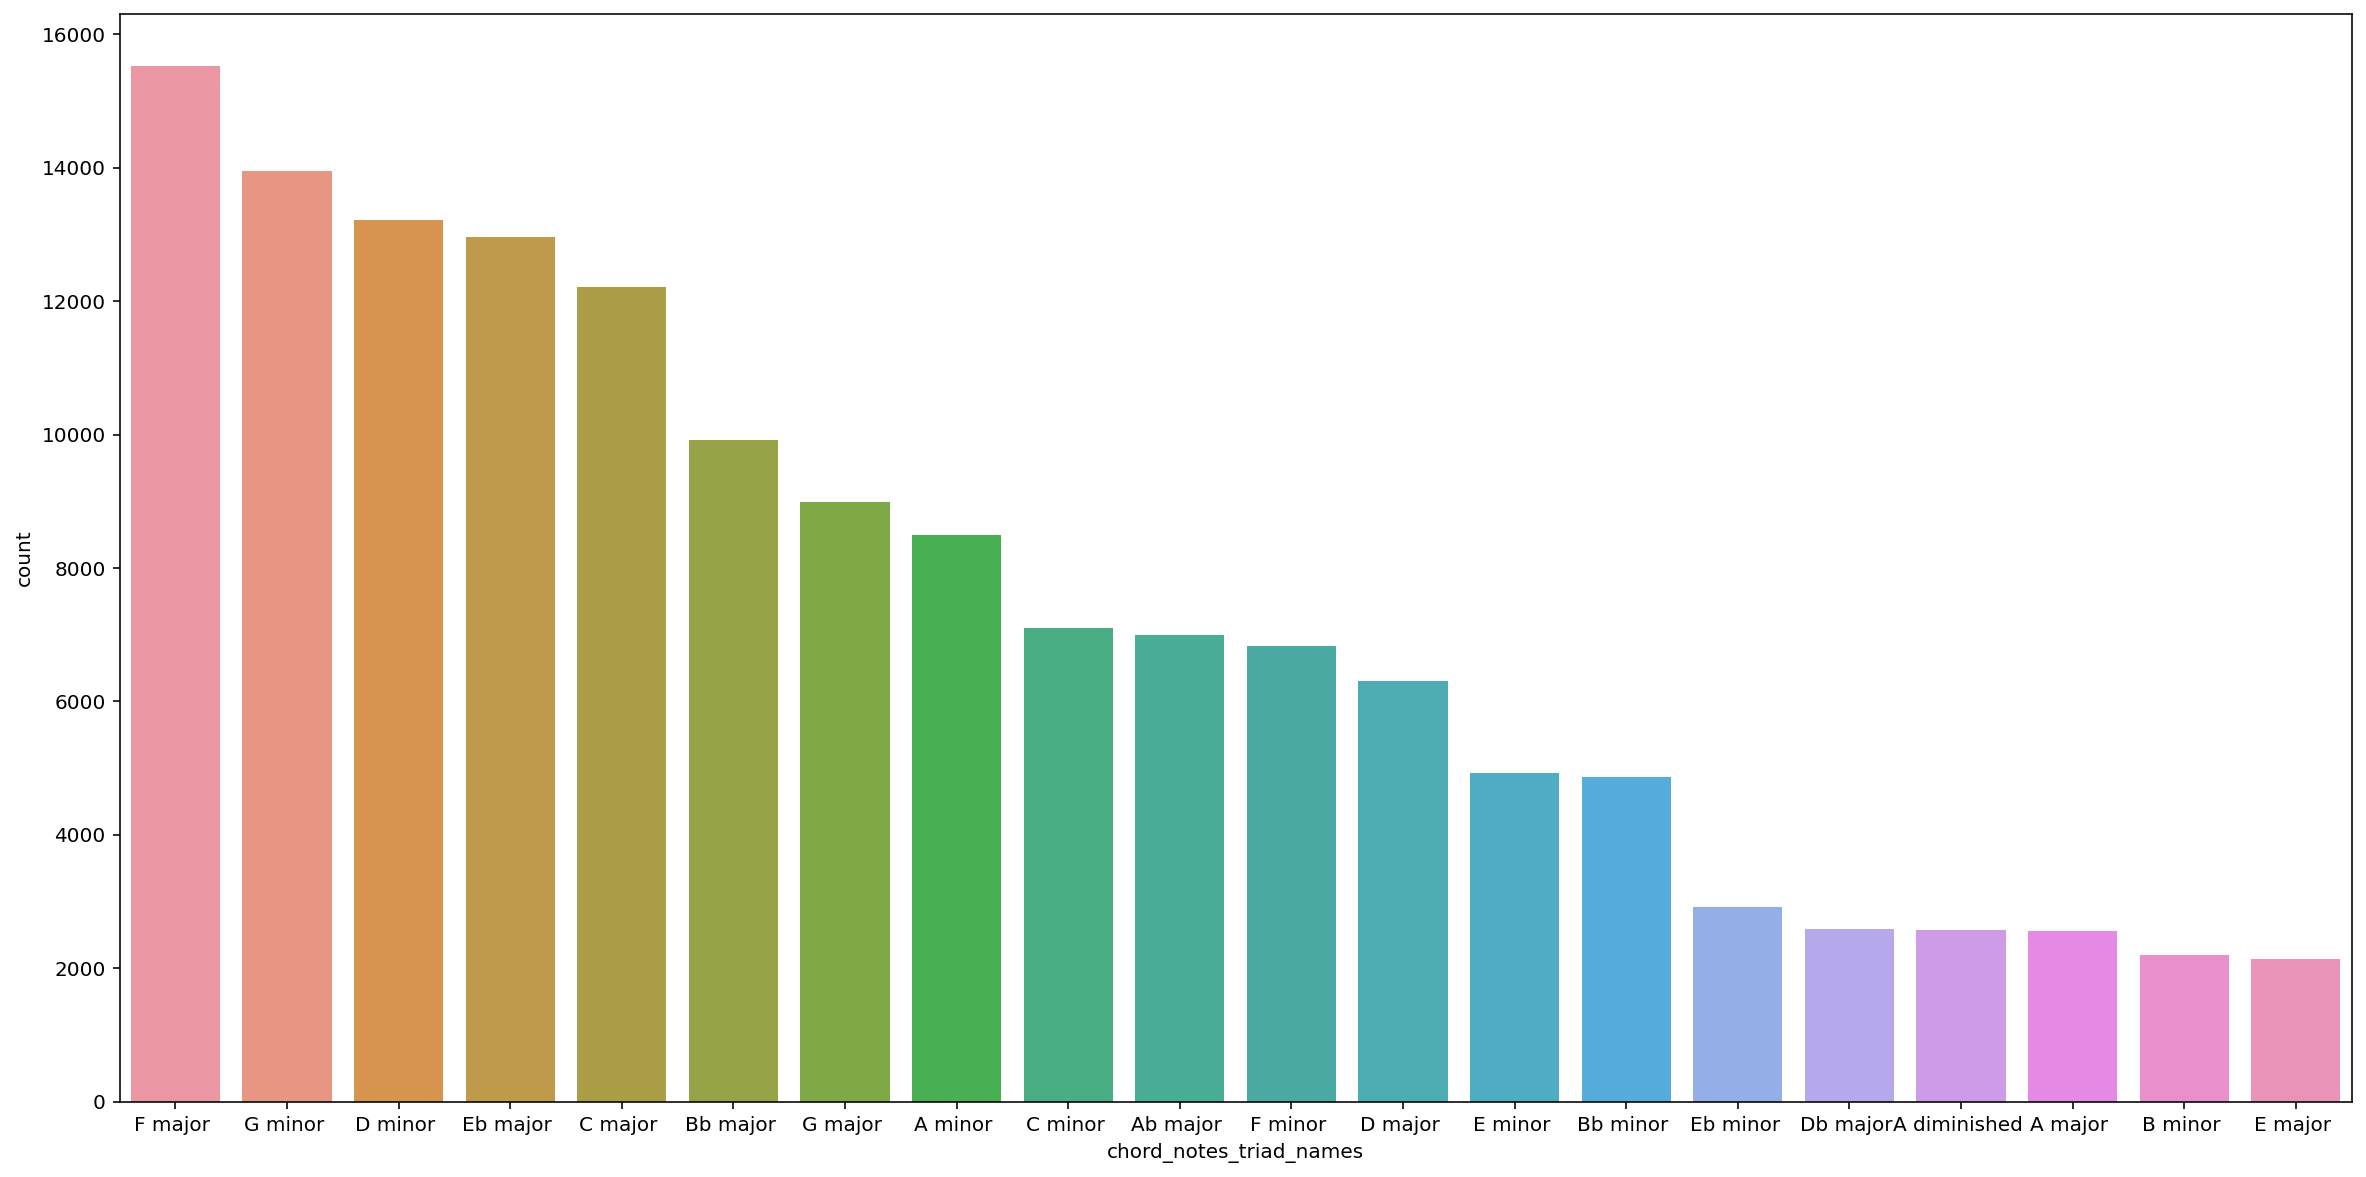

In [114]:
sns.countplot(data=total_df, x='chord_notes_triad_names', order=total_df['chord_notes_triad_names'].value_counts().iloc[:20].index)

In [116]:
folder = '../data/Complete Examples Melodies/Real Book'
filepaths = [y for x in os.walk(folder) for y in glob(os.path.join(x[0], '*.mid'))]

In [117]:
stats = {}

for filepath in filepaths:
    melody = Melody(filepath)
    melody.setup()
    
    stats[melody.filepath] = {
        'key': melody.key
    }
    

In [118]:
s = pd.DataFrame().from_dict(stats).T
s

,key
../data/Complete Examples Melodies/Real Book/A Felicidade.mid,c minor
../data/Complete Examples Melodies/Real Book/A Foggy Day.mid,F major
../data/Complete Examples Melodies/Real Book/A Night In Tunisia.mid,F major
../data/Complete Examples Melodies/Real Book/Accentuate The Positive.mid,a minor
../data/Complete Examples Melodies/Real Book/Afro Blue.mid,b- minor
...,...
../data/Complete Examples Melodies/Real Book/You Don't Know What Love Is.mid,f minor
../data/Complete Examples Melodies/Real Book/You Took Advantage Of Me.mid,E- major
../data/Complete Examples Melodies/Real Book/You've Changed.mid,E- major
../data/Complete Examples Melodies/Real Book/Young And Foolish.mid,C major


In [119]:
s['key_root'] = s['key'].apply(lambda x: x.tonic)
s['key_mode'] = s['key'].apply(lambda x: x.mode)
s['key_name'] = s['key'].apply(lambda x: x.name.replace('-', 'b'))

/media/manu/Data/PycharmProjects/thesis/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='key_name', ylabel='count'>

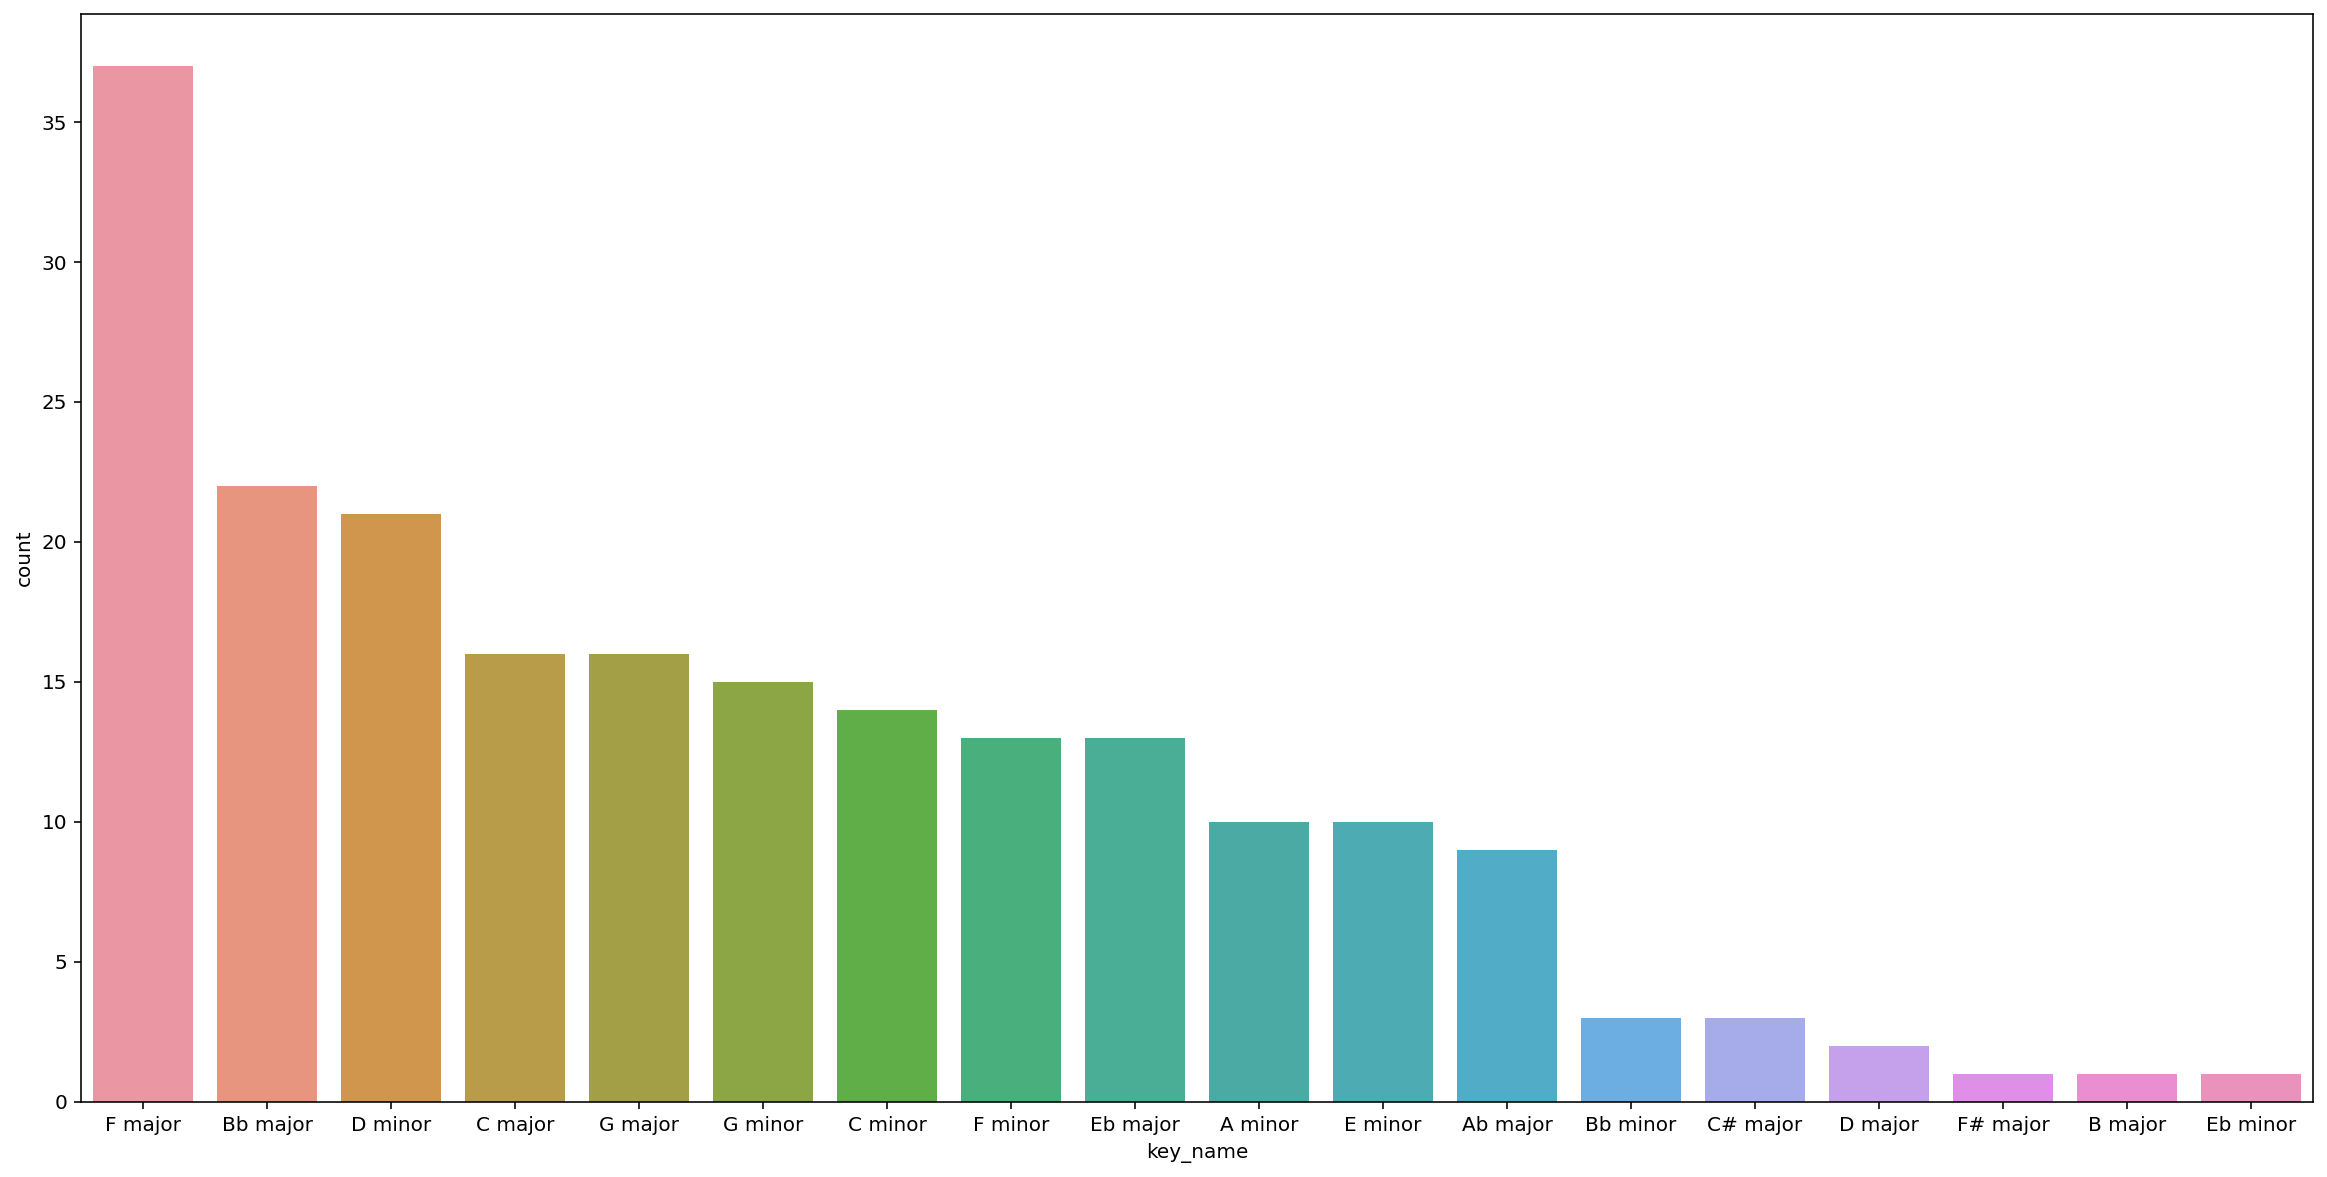

In [120]:
sns.countplot(s['key_name'], order=s['key_name'].value_counts().index)

In [121]:
m = pd.DataFrame().from_dict(metrics).T
m

,H1,H4,GS,original
../data/split_melody/Doug McKenzie/Alone Together_1.csv,2.081601,3.020745,0.945428,False
../data/split_melody/Doug McKenzie/Autumn Leaves_1.csv,2.368826,3.026348,0.74937,False
../data/split_melody/Doug McKenzie/Autumn Leaves_2.csv,2.421461,3.021262,0.722992,False
../data/split_melody/Doug McKenzie/Autumn Leaves_3.csv,2.464039,3.11379,0.726941,False
../data/split_melody/Doug McKenzie/Autumn Leaves_4.csv,2.284321,2.975729,0.733703,False
...,...,...,...,...
../data/split_melody/Weimar DB/David Liebman - Softly As In A Morning Sunrise_2.csv,1.769466,2.665559,0.793431,False
../data/split_melody/Weimar DB/David Liebman - Softly As In A Morning Sunrise_3.csv,1.678214,2.487164,0.81943,False
../data/split_melody/Weimar DB/David Liebman - Softly As In A Morning Sunrise_4.csv,1.700441,2.331667,0.809098,False
../data/split_melody/Weimar DB/David Liebman - Softly As In A Morning Sunrise_5.csv,1.506816,2.620575,0.853537,False


<AxesSubplot:xlabel='H1', ylabel='Count'>

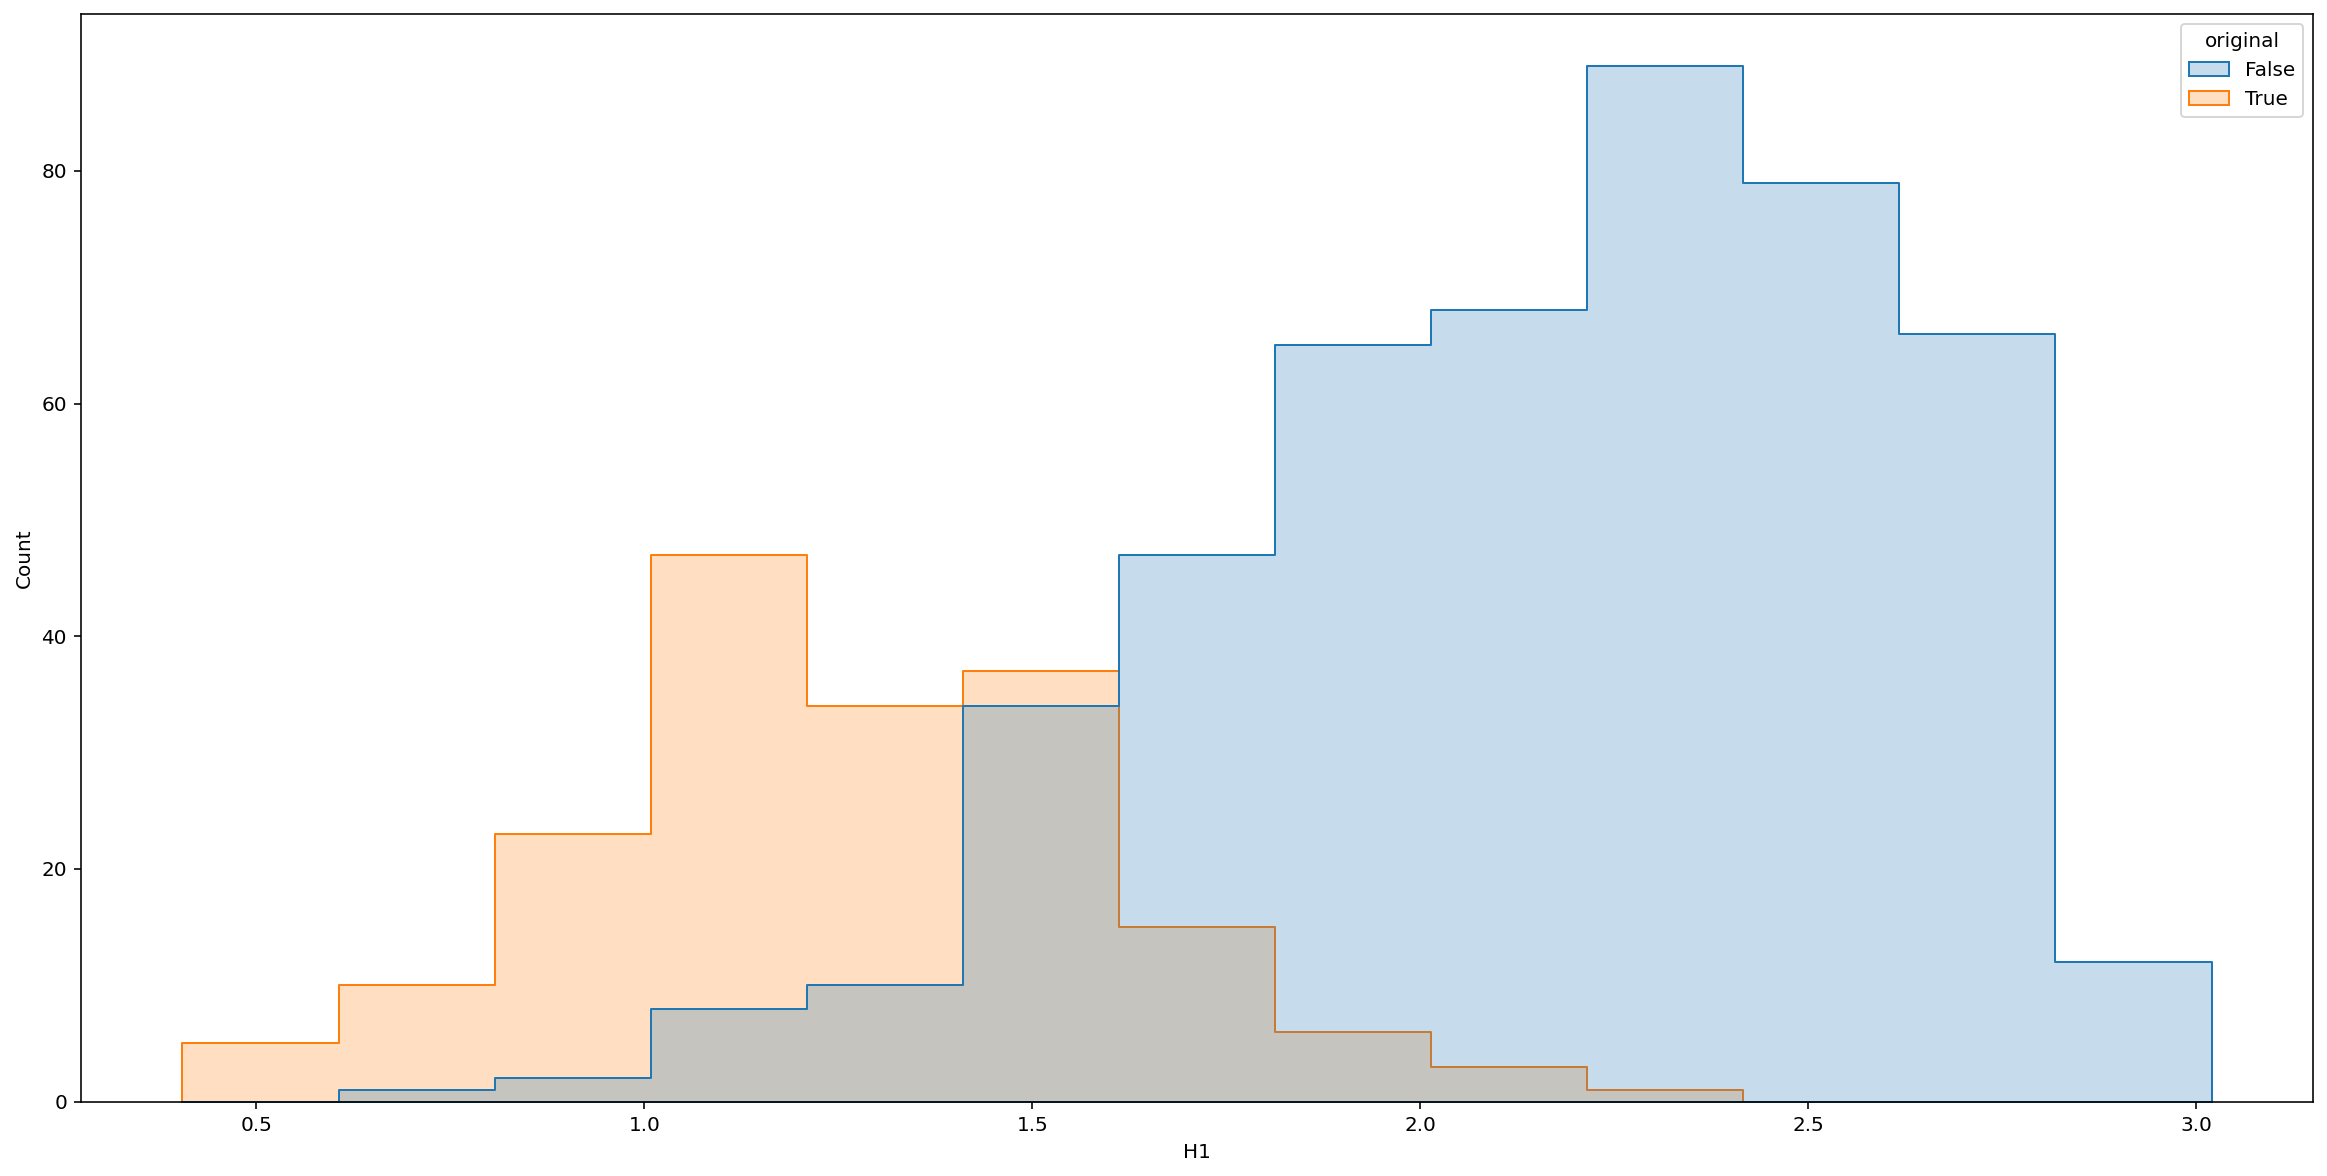

In [122]:
sns.histplot(data=m, x='H1', hue='original', element="step")

In [123]:
m[m['H4'] == 0]

,H1,H4,GS,original


<AxesSubplot:xlabel='H4', ylabel='Count'>

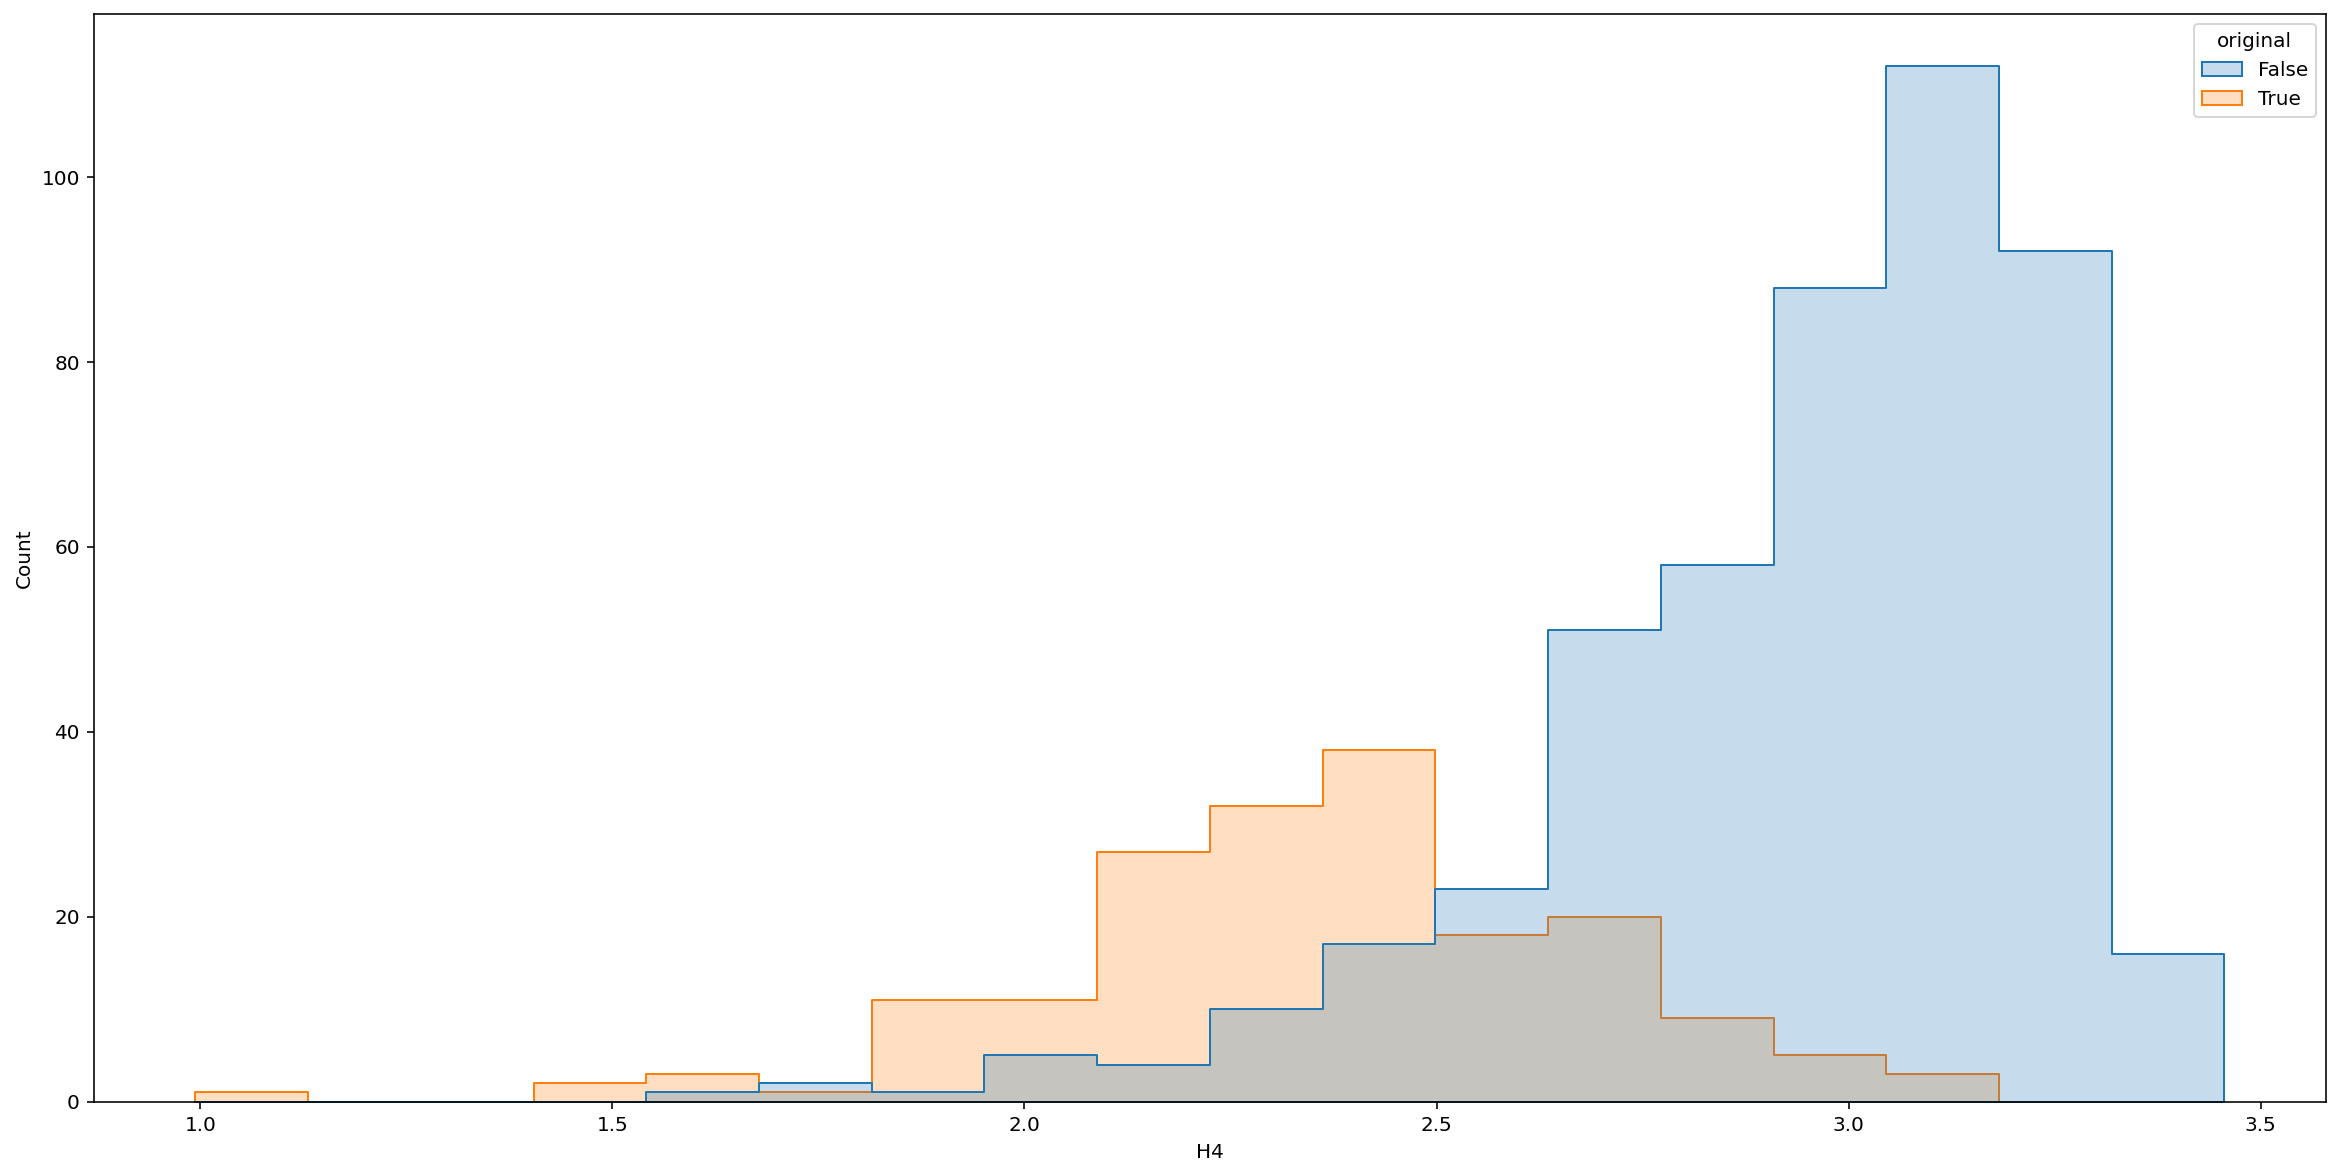

In [124]:
sns.histplot(data=m, x='H4', hue='original', element="step")

<AxesSubplot:xlabel='GS', ylabel='Count'>

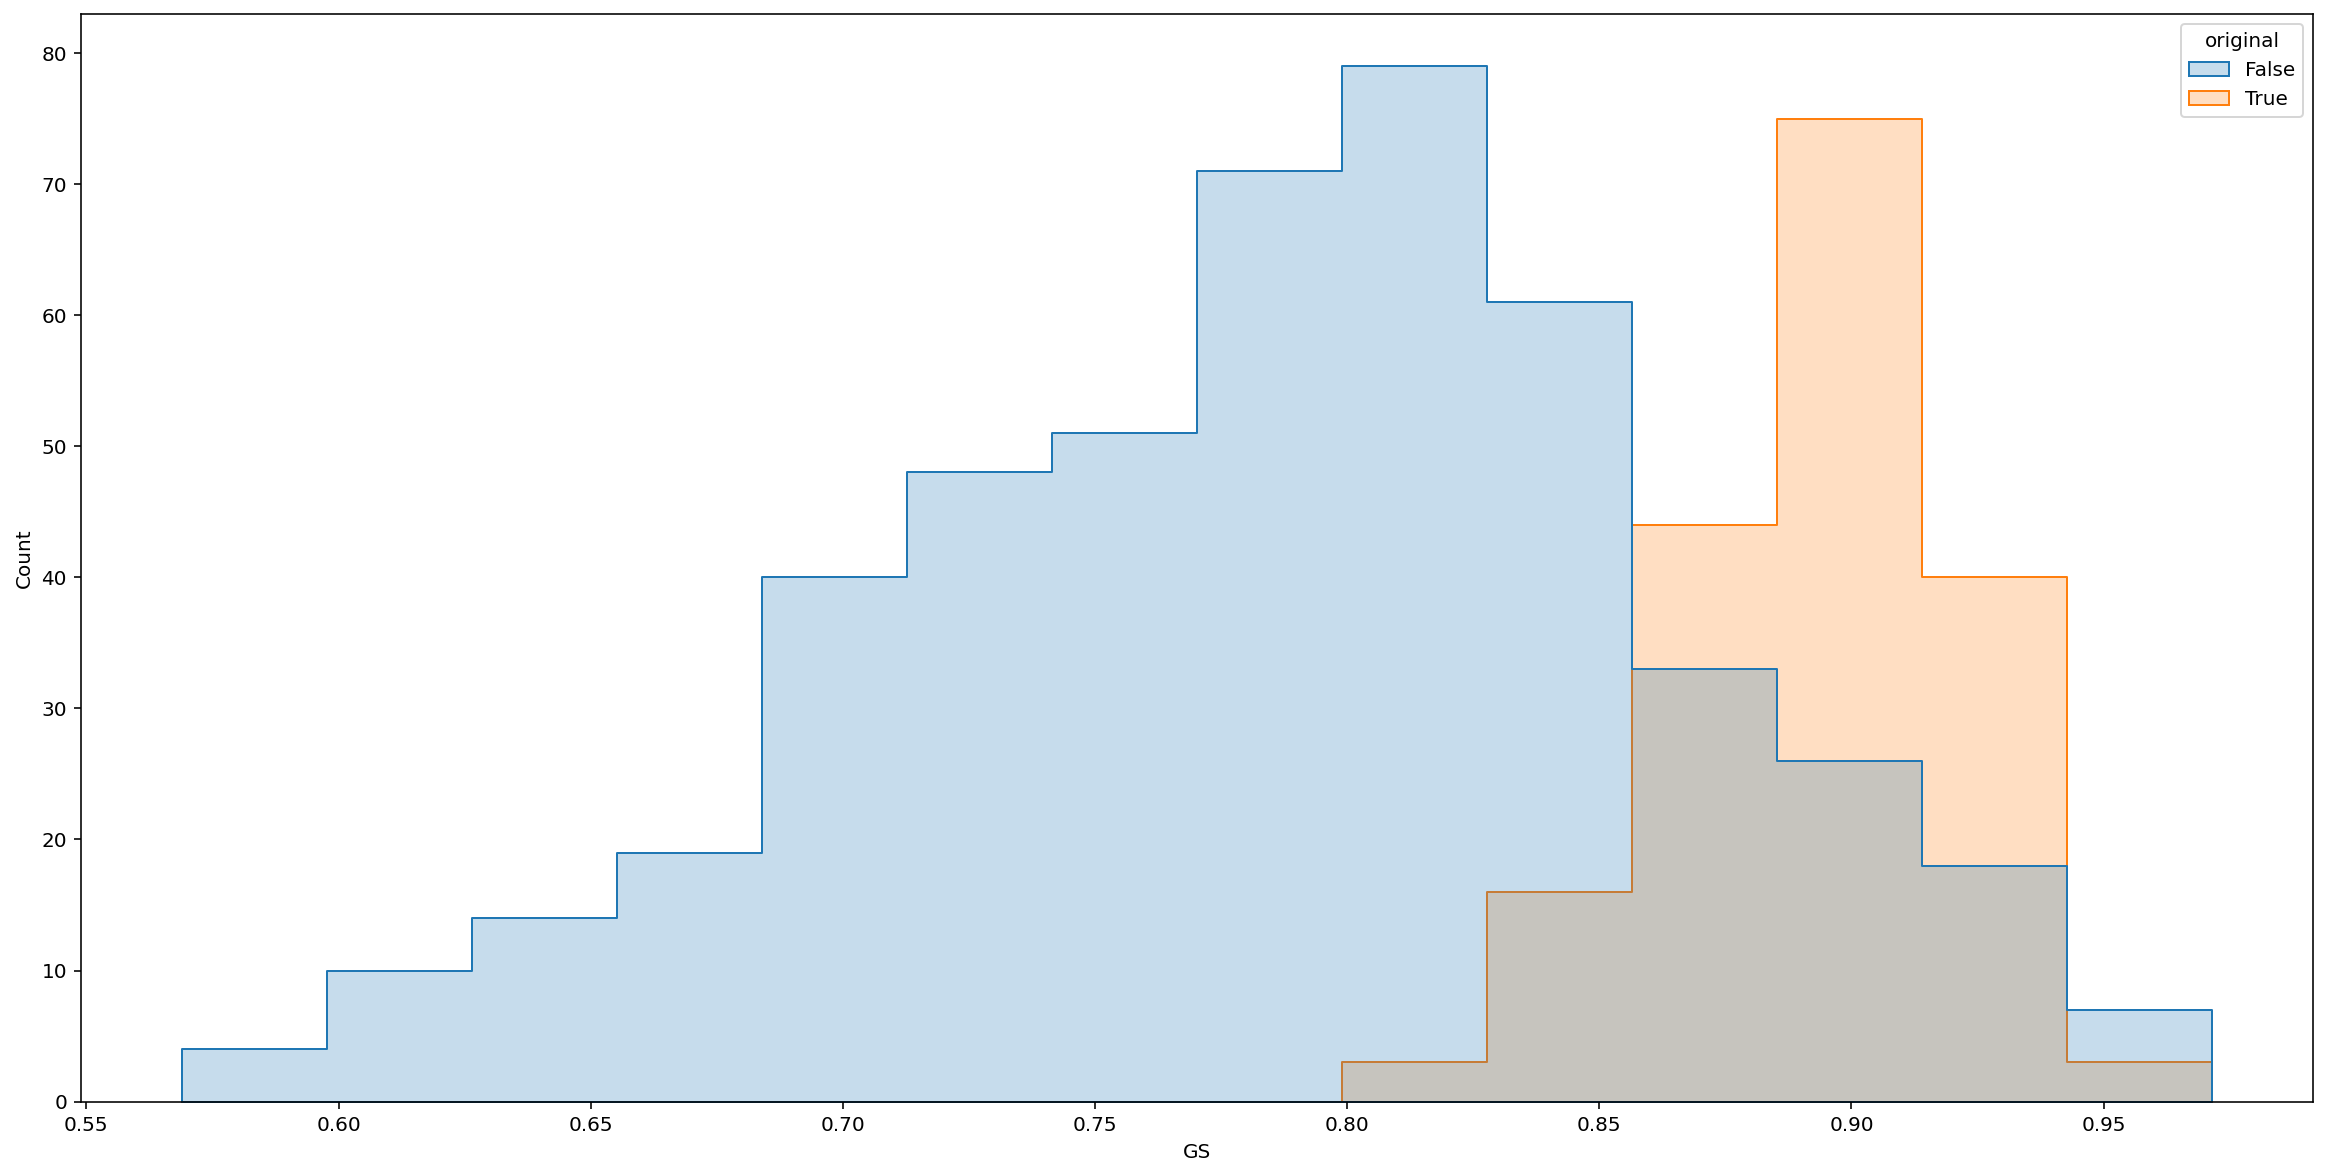

In [125]:
sns.histplot(data=m, x='GS', hue='original', element="step")